In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
elif torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(1, device=device)
    print (x)
else:
    device = torch.device("cpu")
    x = torch.ones(1, device=device)

tensor([1.], device='mps:0')


# Loading the Data

In [2]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("df_all.csv", index_col="startTime", parse_dates=True)

# Crop the DataFrame to the specified date range
df = df.loc["2021-07-01":"2025-06-30"]

# Drop unnecessary columns
df = df.drop(columns=[
    'Forecast Wind',
    'Forecast Solar',
    'Actual Wind',
    'Actual Solar',
    'Settlement Period',
])

display(df.head())

Imbalance Price  Imbalance Volume  Market Price  \
startTime                                                              
2021-07-01 00:00:00        113.94985          308.0143        103.56   
2021-07-01 00:30:00        115.00000          285.1520        106.18   
2021-07-01 01:00:00        114.00000          206.0085        106.23   
2021-07-01 01:30:00        115.00000          106.1017        105.74   
2021-07-01 02:00:00        115.00000          147.7134        106.00   

                     Market Volume  Wind Error  Solar Error  Demand Error  \
startTime                                                                   
2021-07-01 00:00:00         618.45    -110.976          0.0         113.0   
2021-07-01 00:30:00         649.10    -107.774          2.0         512.0   
2021-07-01 01:00:00         555.80    -147.463          0.0         742.0   
2021-07-01 01:30:00         501.70     -89.914          0.0        1066.0   
2021-07-01 02:00:00         687.65      -2.433          0.0        1163.0   

                     De-Rated Margin (1h)  Inter Delta  Non-BM  
startTime                                                       
2021-07-01 00:00:00             12122.264         12.0     0.0  
2021-07-01 00:30:00             12445.298        -22.0     0.0  
2021-07-01 01:00:00             12796.294         48.0     0.0  
2021-07-01 01:30:00             12971.661       -168.0     0.0  
2021-07-01 02:00:00             13257.469         62.0     0.0

In [4]:
# Calculate time of day features
minutes = df.index.hour * 60 + df.index.minute
frac_day = minutes / (24 * 60)
df['tod_sin'] = np.sin(2 * np.pi * frac_day)
df['tod_cos'] = np.cos(2 * np.pi * frac_day)

# Calculate day of week features
day_of_week = df.index.dayofweek
frac_week = day_of_week / 7
df['dow_sin'] = np.sin(2 * np.pi * frac_week)
df['dow_cos'] = np.cos(2 * np.pi * frac_week)

# Calculate month of year features
month = df.index.month
frac_year = (month - 1) / 12
df['moy_sin'] = np.sin(2 * np.pi * frac_year)
df['moy_cos'] = np.cos(2 * np.pi * frac_year)

display(df.head())

Imbalance Price  Imbalance Volume  Market Price  \
startTime                                                              
2021-07-01 00:00:00        113.94985          308.0143        103.56   
2021-07-01 00:30:00        115.00000          285.1520        106.18   
2021-07-01 01:00:00        114.00000          206.0085        106.23   
2021-07-01 01:30:00        115.00000          106.1017        105.74   
2021-07-01 02:00:00        115.00000          147.7134        106.00   

                     Market Volume  Wind Error  Solar Error  Demand Error  \
startTime                                                                   
2021-07-01 00:00:00         618.45    -110.976          0.0         113.0   
2021-07-01 00:30:00         649.10    -107.774          2.0         512.0   
2021-07-01 01:00:00         555.80    -147.463          0.0         742.0   
2021-07-01 01:30:00         501.70     -89.914          0.0        1066.0   
2021-07-01 02:00:00         687.65      -2.433          0.0        1163.0   

                     De-Rated Margin (1h)  Inter Delta  Non-BM   tod_sin  \
startTime                                                                  
2021-07-01 00:00:00             12122.264         12.0     0.0  0.000000   
2021-07-01 00:30:00             12445.298        -22.0     0.0  0.130526   
2021-07-01 01:00:00             12796.294         48.0     0.0  0.258819   
2021-07-01 01:30:00             12971.661       -168.0     0.0  0.382683   
2021-07-01 02:00:00             13257.469         62.0     0.0  0.500000   

                      tod_cos   dow_sin   dow_cos       moy_sin  moy_cos  
startTime                                                                 
2021-07-01 00:00:00  1.000000  0.433884 -0.900969  1.224647e-16     -1.0  
2021-07-01 00:30:00  0.991445  0.433884 -0.900969  1.224647e-16     -1.0  
2021-07-01 01:00:00  0.965926  0.433884 -0.900969  1.224647e-16     -1.0  
2021-07-01 01:30:00  0.923880  0.433884 -0.900969  1.224647e-16     -1.0  
2021-07-01 02:00:00  0.866025  0.433884 -0.900969  1.224647e-16     -1.0

## Summary Plot

/var/folders/bc/9771s35x1x92qwjdzftm3svc0000gn/T/ipykernel_43585/3377850010.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box_no.set_yticklabels(ax_box_no.get_yticks(), rotation=45)
/var/folders/bc/9771s35x1x92qwjdzftm3svc0000gn/T/ipykernel_43585/3377850010.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box_yes.set_yticklabels(ax_box_yes.get_yticks(), rotation=45)


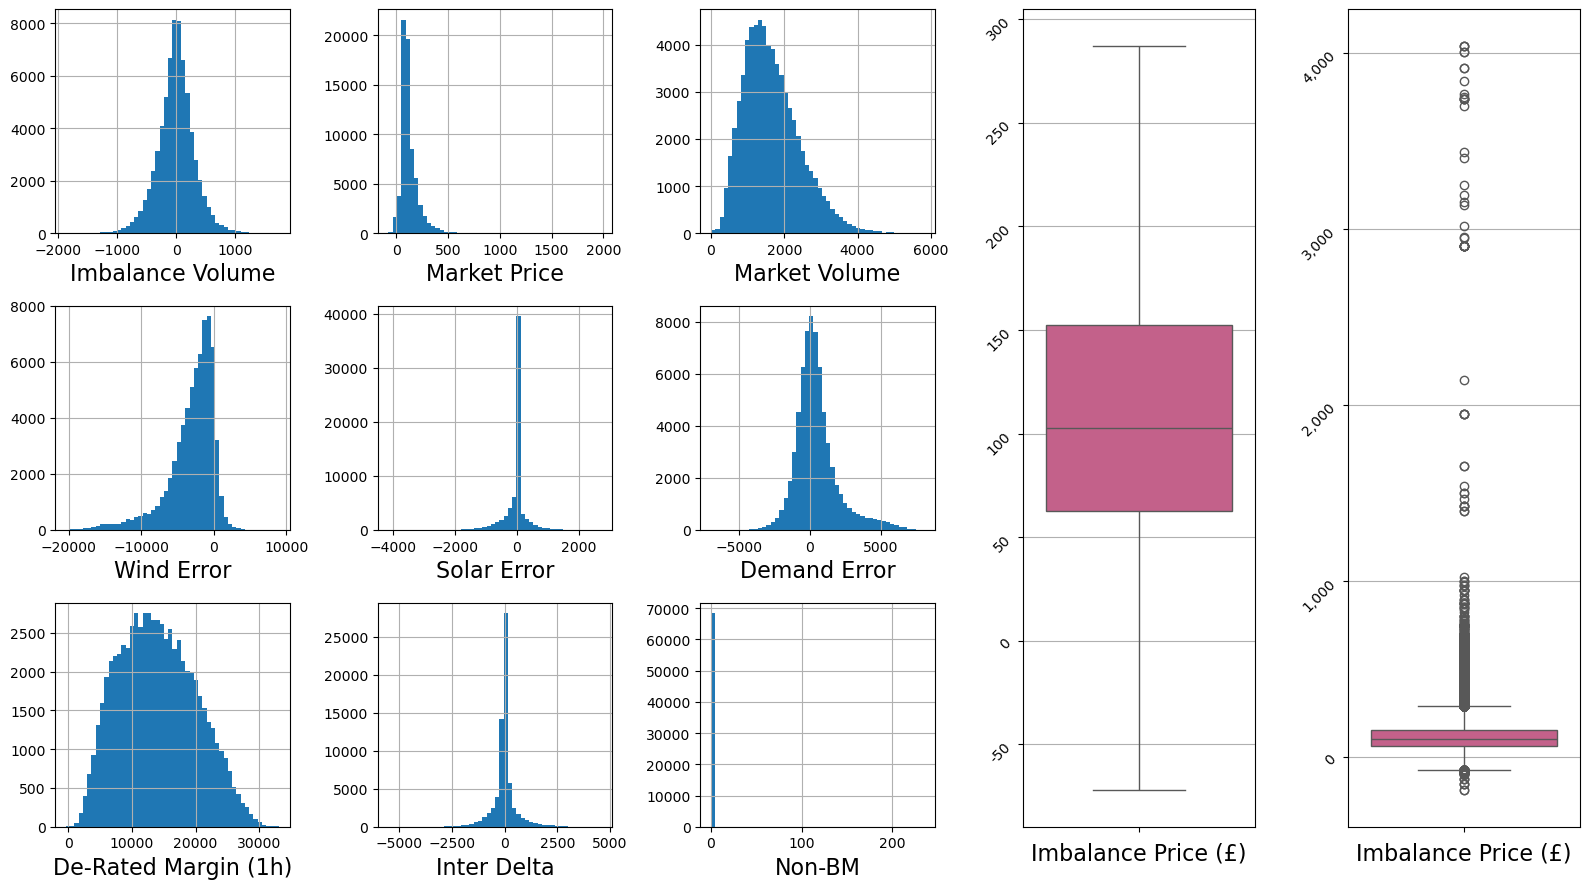

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("plots", exist_ok=True)

# Copy and reorder columns
d = df.copy()
d = d[['Imbalance Volume', 'Market Price', 'Market Volume', 'Wind Error',
       'Solar Error', 'Demand Error', 'De-Rated Margin (1h)', 'Inter Delta',
       'Non-BM', 'tod_sin', 'tod_cos', 'dow_sin', 'dow_cos',
       'moy_sin', 'moy_cos', 'Imbalance Price']]

# Create figure and axes
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(16, 9))
gs = axs[1, 2].get_gridspec()

# Remove rightmost 2 columns for custom boxplots
for ax in axs[:, -2:]:
    for a in ax:
        a.remove()

# Add two side-by-side boxplots in the last two columns
from matplotlib import gridspec
gs_boxes = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[:, -2:], wspace=0.4)

ax_box_no = fig.add_subplot(gs_boxes[0])
ax_box_yes = fig.add_subplot(gs_boxes[1])

# ✅ Rebuild list of only valid histogram axes
axs = [ax for row in axs[:, :-2] for ax in row]

# Columns to plot (all except cyclical features + Imbalance Price)
cols_to_plot = d.columns[:-7]

# Plot histograms
for col, ax in zip(cols_to_plot, axs):
    ax.hist(d[col], bins=50)
    ax.set_xlabel(col, size=16)
    ax.grid()

# Plot boxplot for Imbalance Price (NO outliers)
sns.boxplot(y=d["Imbalance Price"], color="#d45087", ax=ax_box_no, showfliers=False)
ax_box_no.set_yticklabels(ax_box_no.get_yticks(), rotation=45)
ax_box_no.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
ax_box_no.set_xlabel("Imbalance Price (£)", size=16)
ax_box_no.set_ylabel("")
ax_box_no.grid(axis="y")

# Plot boxplot for Imbalance Price (WITH outliers)
sns.boxplot(y=d["Imbalance Price"], color="#d45087", ax=ax_box_yes, showfliers=True)
ax_box_yes.set_yticklabels(ax_box_yes.get_yticks(), rotation=45)
ax_box_yes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
ax_box_yes.set_xlabel("Imbalance Price (£)", size=16)
ax_box_yes.set_ylabel("")
ax_box_yes.grid(axis="y")

# Formatting
fig.subplots_adjust(hspace=0.5)
fig.tight_layout()

fig.savefig("plots/data_summary_plot", dpi=300)
plt.show()


# Hyperparameter Setup

In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

# ─── 1) Train/Val/Test Split ────────────────────────────────────────

train_end = '2025-03-01'  # start of validation
val_end   = '2025-05-01'  # start of test

# slice once …
train_df = df.loc[:train_end]
val_df   = df.loc[train_end:val_end]
test_df  = df.loc[val_end:]

# … then unpack X & y in one go without repeating .drop
X_train, y_train = train_df.drop(columns=['Imbalance Price']), train_df['Imbalance Price']
X_val,      y_val      = val_df.drop(columns=['Imbalance Price']),    val_df['Imbalance Price']
X_test,     y_test     = test_df.drop(columns=['Imbalance Price']),   test_df['Imbalance Price']


# ─── 2) Class Definitions ───────────────────────────────────────────

# ──────────── a. Dataset Definition ─────────────────────────────────

class LSTMDataset(Dataset):
    def __init__(self, X, y, seq_len, horizon=1):
        self.X = torch.as_tensor(X, dtype=torch.float32)
        self.y = torch.as_tensor(y, dtype=torch.float32)
        self.seq_len = seq_len
        self.horizon = horizon

    def __len__(self):
        return self.X.shape[0] - self.seq_len - self.horizon + 1

    def __getitem__(self, idx):
        x_seq    = self.X[idx : idx + self.seq_len]
        target_i = idx + self.seq_len - 1 + self.horizon
        y_target = self.y[target_i]
        return x_seq, y_target


# ──────────── b. Layer Definitions ──────────────────────────────────

class SeasonalAttn(nn.Module):
    def __init__(self, seq_len=48):
        super().__init__()
        self.attn = nn.Parameter(torch.empty(seq_len))
        nn.init.uniform_(self.attn, -0.01, 0.01)

    def forward(self, x):
        return x * self.attn.view(1, -1, 1) # (B,N,F)


class BiLSTM(nn.Module):
    def __init__(self, num_feats, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=num_feats,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=True,
            batch_first=True,
        )

    def forward(self, x):
        out, (_ , _) = self.lstm(x)
        return out


class AttentionPool(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.W_h = nn.Linear(input_dim, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, x):
        e = self.v(torch.tanh(self.W_h(x)))   # (B, N, 1)
        alpha = torch.softmax(e, dim=1)       # (B, N, 1)
        context = torch.sum(alpha * x, dim=1) # (B, 2H)
        return context


# ──────────── c. Model Definitions ──────────────────────────────────

class SA_BiLSTM(nn.Module):
    def __init__(self, num_feats, seq_len=48, hidden_size=64, num_layers=2):
        super().__init__()
        self.seasonal = SeasonalAttn(seq_len)
        self.lstm = BiLSTM(num_feats, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        x = self.seasonal(x)       # (B, N, F)
        out = self.lstm(x)         # (B, N, 2H)
        last = out[:, -1, :]       # (B, 2H)
        return self.fc(last).squeeze(-1)  # (B,)


class SA_BiLSTM_AttnPool(nn.Module):
    def __init__(self, num_feats, seq_len=48, hidden_size=64, num_layers=2):
        super().__init__()
        self.seasonal = SeasonalAttn(seq_len)
        self.lstm = BiLSTM(num_feats, hidden_size, num_layers)
        self.pool = AttentionPool(input_dim=hidden_size * 2, hidden_dim=hidden_size)
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        x = self.seasonal(x)       # (B, N, F)
        out = self.lstm(x)         # (B, N, 2H)
        context = self.pool(out)   # (B, 2H)
        return self.fc(context).squeeze(-1)  # (B,)


# ─── 3) Device ───────────────────────────────────────────────────────

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


# ─── 4) Time‐feature lists and scaler ────────────────────────────────

possible_time_feats  = ['tod_sin','tod_cos','dow_sin','dow_cos','moy_sin','moy_cos']
time_feats  = [c for c in possible_time_feats if c in df.columns]
other_feats = [c for c in X_train.columns if c not in time_feats]


# ─── 5) CV Splitter & Hyperparameters ───────────────────────────────

TRANSFORMER_FACTORY = {
    "MinMax": MinMaxScaler,
    "Robust": RobustScaler,
    "Standard": StandardScaler,
    "MaxAbs": MaxAbsScaler
}
MODEL_FACTORY = {
    "SA_BiLSTM": SA_BiLSTM,
    "SA_BiLSTM_AttnPool": SA_BiLSTM_AttnPool
}
LOSS_FACTORY = {
    "MAE": nn.L1Loss,
    "MSE": nn.MSELoss,
    "Huber": nn.SmoothL1Loss
}


# MODEL HYPERPARAMETERS
seq_len     = 48
batch_size  = 128
hidden_size = 64
num_layers  = 2

# TRAINING HYPERPARAMETERS
horizon     = 1
lr          = 1e-4
max_epochs  = 200
patience    = 20
scaler_used = "MaxAbs"
model_used  = "SA_BiLSTM"
loss_used   = "Huber"
beta        = 0.01 # For Huber loss only
notes       = None

# ─── 6) Model Tag & Directory ────────────────────────────────────────         

md = {
    "horizon":       horizon,
    "model":         model_used,
    "scaler":        scaler_used,
    "loss":          loss_used,
    "learning_rate": lr,
    "batch_size":    batch_size,
    "hidden_size":   hidden_size,
    "num_layers":    num_layers,
    "seq_len":       seq_len,
    "max_epochs":    max_epochs,
    "patience":      patience,
    **({"notes": notes} if notes is not None else {}),
}

initials = lambda s: "".join(w[0] for w in s.split("_"))

parts = []
for k, v in md.items():
    if k in ("horizon", "model", "scaler", "loss", "notes"):
        s = str(v)
    else:
        # convert to string and clip leading “0.”
        s = str(v)
        if isinstance(v, float) and s.startswith("0."):
            s = s.replace("0.", ".")
        # prefix with initials for non-string params
        s = f"{initials(k)}{s}"
    parts.append(s)
tag = "_".join(parts)

models_root = "models"
candidate   = os.path.join(models_root, tag)
version     = 0

while os.path.exists(candidate):
    version   += 1
    candidate = f"{os.path.join(models_root, tag)}_v{version}"

Using device: mps


In [4]:
import numpy as np
import torch
from torch.utils.data import DataLoader

# 0) Convert pandas → NumPy if needed
X_train_np = X_train.values    # shape: (N, num_features)
y_train_np = y_train.values    # shape: (N,)

# 1) Instantiate your existing ("broken") dataset
seq_len = 48
ds = LSTMDataset(X_train_np, y_train_np, seq_len, horizon=horizon)

# 2) Wrap in a DataLoader
loader = DataLoader(ds, batch_size=1, shuffle=False)

# 3) Iterate first 5 samples and print last_in_window, y_tgt, raw_next
for idx, (x_seq, y_tgt) in enumerate(loader):
    if idx > 4:
        break
    # true last in the input window
    y_last    = y_train_np[idx + seq_len - 1]
    # what you really want to predict
    raw_next  = y_train_np[idx + seq_len]

    print(
        f"idx={idx:2d}  "
        f"last_y={y_last:6.3f}  "
        f"y_tgt={y_tgt.item():6.3f}  "
        f"raw_next={raw_next:6.3f}"
    )


idx= 0  last_y=70.880  y_tgt=67.930  raw_next=67.930
idx= 1  last_y=67.930  y_tgt=69.460  raw_next=69.460
idx= 2  last_y=69.460  y_tgt=100.000  raw_next=100.000
idx= 3  last_y=100.000  y_tgt=106.500  raw_next=106.500
idx= 4  last_y=106.500  y_tgt=106.500  raw_next=106.500


# Training

In [ ]:
# ─── TEST-EVALUATION + EARLY STOPPING ────────────────────────────────
import os, json, copy
import numpy as np
import torch
import sys, random
import joblib
from datetime import datetime, timezone
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ─── Create directory ──────────────────────────────────────────────
os.makedirs(candidate, exist_ok=True)
base_dir = candidate
print(f"→ Saving run in: {base_dir}")

# ─────────────────────────────────────────────────────────────────────
# ─── 1) SCALE TRAIN/VAL/TEST ─────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────
scaler = TRANSFORMER_FACTORY[scaler_used]()
transformer = ColumnTransformer(
    [('scale', scaler, other_feats)],
    remainder='passthrough',
    verbose_feature_names_out=False
)
X_tr_np  = transformer.fit_transform(X_train)
X_val_np = transformer.transform(X_val)
X_te_np  = transformer.transform(X_test)

scaler_y = scaler.fit(y_train.values.reshape(-1,1))
y_tr_np  = scaler_y.transform(y_train.values.reshape(-1,1)).flatten()
y_val_np = scaler_y.transform(y_val.values.reshape(-1,1)).flatten()
y_te_np  = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()


# ─────────────────────────────────────────────────────────────────────
# ─── 2) BUILD DATALOADERS ────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────
train_loader = DataLoader(LSTMDataset(X_tr_np,  y_tr_np,  seq_len, horizon),
                          batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(LSTMDataset(X_val_np, y_val_np, seq_len, horizon),
                          batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(LSTMDataset(X_te_np,  y_te_np,  seq_len, horizon),
                          batch_size=batch_size, shuffle=False, pin_memory=True)

# ─────────────────────────────────────────────────────────────────────
# ─── 3) INSTANTIATE MODEL, OPTIMIZER, CRITERION ──────────────────────
# ─────────────────────────────────────────────────────────────────────
model = MODEL_FACTORY[model_used](
    num_feats=X_tr_np.shape[1],
    hidden_size=hidden_size,
    num_layers=num_layers,
    seq_len=seq_len
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

if loss_used.startswith("Huber"):
    criterion = LOSS_FACTORY[loss_used](beta=beta)
else:
    criterion = LOSS_FACTORY[loss_used]()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-7
)

# ─────────────────────────────────────────────────────────────────────
# ─── 4) TRAIN w/ EARLY STOPPING ON VAL ───────────────────────────────
# ─────────────────────────────────────────────────────────────────────
best_val = float('inf')
best_ckpt = None
epochs_no_improve = 0

for epoch in range(1, max_epochs+1):
    # — train —
    model.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb).squeeze(-1), yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # — validate —
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            val_loss += criterion(model(xb).squeeze(-1), yb).item()
    val_loss /= len(val_loader)

    scheduler.step(val_loss)

    print(f"[Epoch {epoch:03d}] train={train_loss:.5f}  val={val_loss:.5f}")

    # — early stop check —
    if val_loss < best_val:
        best_val = val_loss
        epochs_no_improve = 0
        # keep a copy of best weights
        best_ckpt = {
            'model':     copy.deepcopy(model.state_dict()),
            'optimizer': copy.deepcopy(optimizer.state_dict())
        }
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"→ early stopping after {epoch} epochs")
            break

# restore best model
model.load_state_dict(best_ckpt['model'])
optimizer.load_state_dict(best_ckpt['optimizer'])

# ─────────────────────────────────────────────────────────────────────
# # ─── 5) INFERENCE ON TEST ──────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────
model.eval()
scaled_preds, scaled_trues = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        p  = model(xb).squeeze(-1).cpu().numpy()
        scaled_preds.append(p)
        scaled_trues.append(yb.numpy())
scaled_preds = np.concatenate(scaled_preds)
scaled_trues = np.concatenate(scaled_trues)

# invert scaling
preds_gbp  = scaler_y.inverse_transform(scaled_preds.reshape(-1,1)).flatten()
trues_gbp  = scaler_y.inverse_transform(scaled_trues.reshape(-1,1)).flatten()
err        = trues_gbp - preds_gbp

# compute metrics
mae        = mean_absolute_error(trues_gbp, preds_gbp)
rmse       = np.sqrt(mean_squared_error(trues_gbp, preds_gbp))
smape      = np.mean(2.0 * np.abs(err) /
                    (np.abs(trues_gbp) + np.abs(preds_gbp) + 1e-8)) * 100
huber_loss = np.where(np.abs(err) <= beta,
                      0.5 * err**2 / beta,
                      np.abs(err) - 0.5 * beta)
huber      = huber_loss.mean()

print(f"\nTEST → MAE={mae:.4f}, RMSE={rmse:.4f}, SMAPE={smape:.4f}%, Huber={huber:.4f}")


# ─────────────────────────────────────────────────────────────────────
# ─── 6) BUILD METADATA ───────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────
class NpTorchJSONEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, np.generic):
            return o.item()
        if isinstance(o, np.ndarray):
            return o.tolist()
        if isinstance(o, torch.Tensor):
            return o.detach().cpu().tolist()
        if isinstance(o, torch.device):
            return str(o)
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

# a. Environment metadata
env_meta = {
    "seed_torch":           torch.initial_seed(),
    "seed_numpy":           np.random.get_state()[1][0],
    "seed_python":          random.getstate()[1][0],
    "cudnn_deterministic":  torch.backends.cudnn.deterministic,
    "cudnn_benchmark":      torch.backends.cudnn.benchmark,
    "torch_version":        torch.__version__,
    "python_version":       sys.version.split()[0],
    "run_timestamp":        datetime.now(timezone.utc).isoformat()
}

# b. Data split & shapes
data_meta = {
    "start":     train_df.index.min().strftime('%Y-%m-%d'),
    "train_end": train_end,
    "val_end":   val_end,
    "end":       test_df.index.max().strftime('%Y-%m-%d'),
    "seq_len":   seq_len,
    "n_train":   len(train_loader.dataset),
    "n_val":     len(val_loader.dataset),
    "n_test":    len(test_loader.dataset)
}

# c. Feature‐engineering choices
feat_meta = {
    **({"time_feats": time_feats} if time_feats else {}),
    "other_feats":     other_feats,
    "n_features":      X_tr_np.shape[1],
    "scaler":          scaler_used,
    "scaler_params":   transformer.named_transformers_['scale'].get_params()
}

# d. DataLoader settings
loader_meta = {
    "batch_size":  batch_size,
    "shuffle":     True,
    "num_workers": 0,
    "pin_memory":  True,
    "device":      str(device)
}

# e. Core hyperparameters
hyperparams = {
    "model":          model_used,
    "horizon":        horizon,
    "scaler":         scaler_used,
    "loss":           loss_used,
    **({"beta": beta} if loss_used == "Huber" else {}),
    "learning_rate":  lr,
    "batch_size":     batch_size,
    "hidden_size":    hidden_size,
    "num_layers":     num_layers,
    "seq_len":        seq_len
}

# f. Optimizer metadata
optim_meta = {
    "type": optimizer.__class__.__name__,
    "lr":   optimizer.defaults.get("lr"),
    **{k: optimizer.defaults[k]
       for k in ("betas","eps","weight_decay")
       if k in optimizer.defaults}
}

# g. Scheduler metadata
sched_meta = {
    "type":     scheduler.__class__.__name__,
    "mode":     getattr(scheduler, "mode", None),
    "factor":   getattr(scheduler, "factor", None),
    "patience": getattr(scheduler, "patience", None),
    "min_lr":   (scheduler.min_lrs[0]
                 if hasattr(scheduler, "min_lrs")
                 else getattr(scheduler, "eta_min", None))
}

# h. Early‐stop metadata
earlystop_meta = {
    "max_epochs": max_epochs,
    "patience":   patience
}

# i. Metrics
metrics_meta = {
    "mae":   float(mae),
    "rmse":  float(rmse),
    "smape": float(smape),
    "huber": float(huber)
}


# ─────────────────────────────────────────────────────────────────────
# ─── 7) SAVE CHECKPOINT & SUMMARY ────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────
# Build and save the PyTorch checkpoint
torch.save({
    "model_state_dict":     model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "scheduler_state_dict": scheduler.state_dict(),
}, os.path.join(base_dir, "torch_model.pt"))
print(f"✅ Saved model to {base_dir}/torch_model.pt")

# Save scikit objects with joblib
joblib.dump({
    "transformer": transformer,
    "scaler_y":    scaler_y
}, os.path.join(base_dir, "scikit_objects.joblib"))
print(f"✅ Saved scikit objects to {base_dir}/scikit_objects.joblib")

# Build and save the human-readable JSON summary
final_summary = {
    "environment":  env_meta,
    "data":         data_meta,
    "features":     feat_meta,
    "dataloader":   loader_meta,
    "hyperparams":  hyperparams,
    "optimizer":    optim_meta,
    "scheduler":    sched_meta,
    "early_stop":   earlystop_meta,
    "metrics":      metrics_meta,
}

with open(os.path.join(base_dir, "test_summary.json"), "w") as f:
    json.dump(final_summary, f, indent=2, cls=NpTorchJSONEncoder)
print(f"✅ Saved json summary to {base_dir}/test_summary.json")


# Loading a saved model

In [8]:
import os
import json
import joblib
import torch
import ipywidgets as widgets
from IPython.display import display, clear_output
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ─── Make sure your MODEL_FACTORY is in scope ────────────────────────
# from your_module import MODEL_FACTORY

# 1) Device
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps"  if torch.backends.mps.is_available() else
    "cpu"
)

# 2) Gather saved runs
models_dir = "models"
runs = sorted(
    d for d in os.listdir(models_dir)
    if os.path.isdir(os.path.join(models_dir, d))
)

dd  = widgets.Dropdown(options=runs, description="Run:", layout=widgets.Layout(width="60%"))
btn = widgets.Button(description="Load", button_style="success")
out = widgets.Output()

# 3) Scheduler factory for future‐proofing
SCHEDULER_FACTORY = {
    "ReduceLROnPlateau": lambda opt, cfg: ReduceLROnPlateau(
        opt,
        mode     = cfg.get("mode",     "min"),
        factor   = cfg.get("factor",   0.5),
        patience = cfg.get("patience", 5),
        min_lr   = cfg.get("min_lr",   1e-7)
    ),
    # add other schedulers here as needed
}

def on_load(_):
    run     = dd.value
    run_dir = os.path.join(models_dir, run)

    # a) Load JSON summary
    with open(os.path.join(run_dir, "test_summary.json"), "r") as f:
        summary = json.load(f)
    hp         = summary["hyperparams"]
    feat_meta  = summary["features"]
    sched_meta = summary["scheduler"]
    metrics    = summary.get("metrics", {})

    time_feats  = feat_meta.get("time_feats", [])
    other_feats = feat_meta["other_feats"]
    all_feats   = time_feats + other_feats

    # Update num_feats just in case:
    num_feats = len(all_feats)

    # c) Rebuild model
    model_cls = MODEL_FACTORY[hp["model"]]
    model     = model_cls(
                    num_feats   = num_feats,
                    hidden_size = hp["hidden_size"],
                    num_layers  = hp["num_layers"],
                    seq_len     = hp["seq_len"]
                ).to(device)

    # d) Rebuild optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=hp["learning_rate"])

    # e) Rebuild scheduler via factory
    scheduler = SCHEDULER_FACTORY[sched_meta["type"]](optimizer, sched_meta)

    # f) Load PyTorch weights
    ckpt = torch.load(
        os.path.join(run_dir, "torch_model.pt"),
        map_location=device,
        weights_only=False
    )
    model.load_state_dict(    ckpt["model_state_dict"]    )
    optimizer.load_state_dict(ckpt["optimizer_state_dict"])
    scheduler.load_state_dict(ckpt["scheduler_state_dict"])
    model.to(device)

    # g) Load sklearn objects
    scikit = joblib.load(os.path.join(run_dir, "scikit_objects.joblib"))
    transformer = scikit["transformer"]
    scaler_y    = scikit["scaler_y"]

    # h) Expose to globals
    globals().update({
        "model":       model,
        "optimizer":   optimizer,
        "scheduler":   scheduler,
        "transformer": transformer,
        "scaler_y":    scaler_y,
        "summary":     summary,
        "base_dir":    run_dir,
        "time_feats": time_feats,
        "other_feats": other_feats,
        "all_feats":   all_feats,
    })

    with out:
        clear_output()
        print(f"✅ Loaded run '{run}' on {device}\n")
        print("Hyperparameters:")
        print(json.dumps(hp, indent=2))
        print("\nScheduler settings:")
        print(json.dumps(sched_meta, indent=2))
        print("\nMetrics:")
        print(json.dumps({k: round(v,3) for k, v in metrics.items()}, indent=2))

btn.on_click(on_load)
display(dd, btn, out)


Dropdown(description='Run:', layout=Layout(width='60%'), options=('SA_BiLSTM_MaxAbs_Huber_lr.0001_bs128_hs64_n…

Button(button_style='success', description='Load', style=ButtonStyle())

Output()

# Testing Only

In [53]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from torch.utils.data import DataLoader

# Pull hyperparams from summary
seq_len    = summary['hyperparams']['seq_len']
batch_size = summary['hyperparams']['batch_size']

# 1) Transform test set (X_test, y_test already in memory)
X_te_np = transformer.transform(X_test)
y_te_np = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

# 2) Build DataLoader
test_loader = DataLoader(
    LSTMDataset(X_te_np, y_te_np, seq_len),
    batch_size=batch_size, shuffle=False
)

# 3) Inference
model.eval()
scaled_preds, scaled_trues = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        p  = model(xb).cpu().numpy()
        scaled_preds.append(p)
        scaled_trues.append(yb.numpy())
scaled_preds = np.concatenate(scaled_preds)
scaled_trues = np.concatenate(scaled_trues)

# 4) Inverse‐scale back to original units
preds_orig = scaler_y.inverse_transform(scaled_preds.reshape(-1,1)).flatten()
trues_orig = scaler_y.inverse_transform(scaled_trues.reshape(-1,1)).flatten()

# 5) Compute metrics
mae_val  = mean_absolute_error(trues_orig, preds_orig)
rmse_val = np.sqrt(mean_squared_error(trues_orig, preds_orig))
smape_val = np.mean(2.0 * np.abs(trues_orig - preds_orig) /
                    (np.abs(trues_orig) + np.abs(preds_orig) + 1e-8)) * 100
r2 = r2_score(trues_orig, preds_orig)

print(f"Test MAE:   £{mae_val:.2f}")
print(f"Test RMSE:  £{rmse_val:.2f}")
print(f"Test sMAPE: {smape_val:.2f}%")
print(f"Test R²:     {r2:.3f}")

Test MAE:   £11.32
Test RMSE:  £14.90
Test sMAPE: 31.29%
Test R²:     0.868


# Plots

In [44]:
import os
import matplotlib.pyplot as plt

# Create plots directory in the current model run directory
plots_dir = os.path.join(base_dir, "plots")
os.makedirs(plots_dir, exist_ok=True)

# Also keep a general plots directory for cases when no model is loaded
os.makedirs("plots", exist_ok=True)

plt.rcParams.update({
    # Resolution
    "figure.dpi": 300,
    # Font
    "font.family": "Times New Roman",
    "mathtext.fontset": "stix",
    # Figure size (optional – adjust as needed)
    "figure.figsize": (10, 6),
    # Title and label font sizes
    "figure.titlesize": 18,    # overall figure title
    "axes.titlesize": 18,      # axes title
    "axes.labelsize": 14,      # x/y axis labels
    # Tick label size
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    # Legend
    "legend.fontsize": 12,
    # Line width (for plot lines)
    "lines.linewidth": 1.5,
    # Grid styling (optional)
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.3,
})



## Predicted vs. True

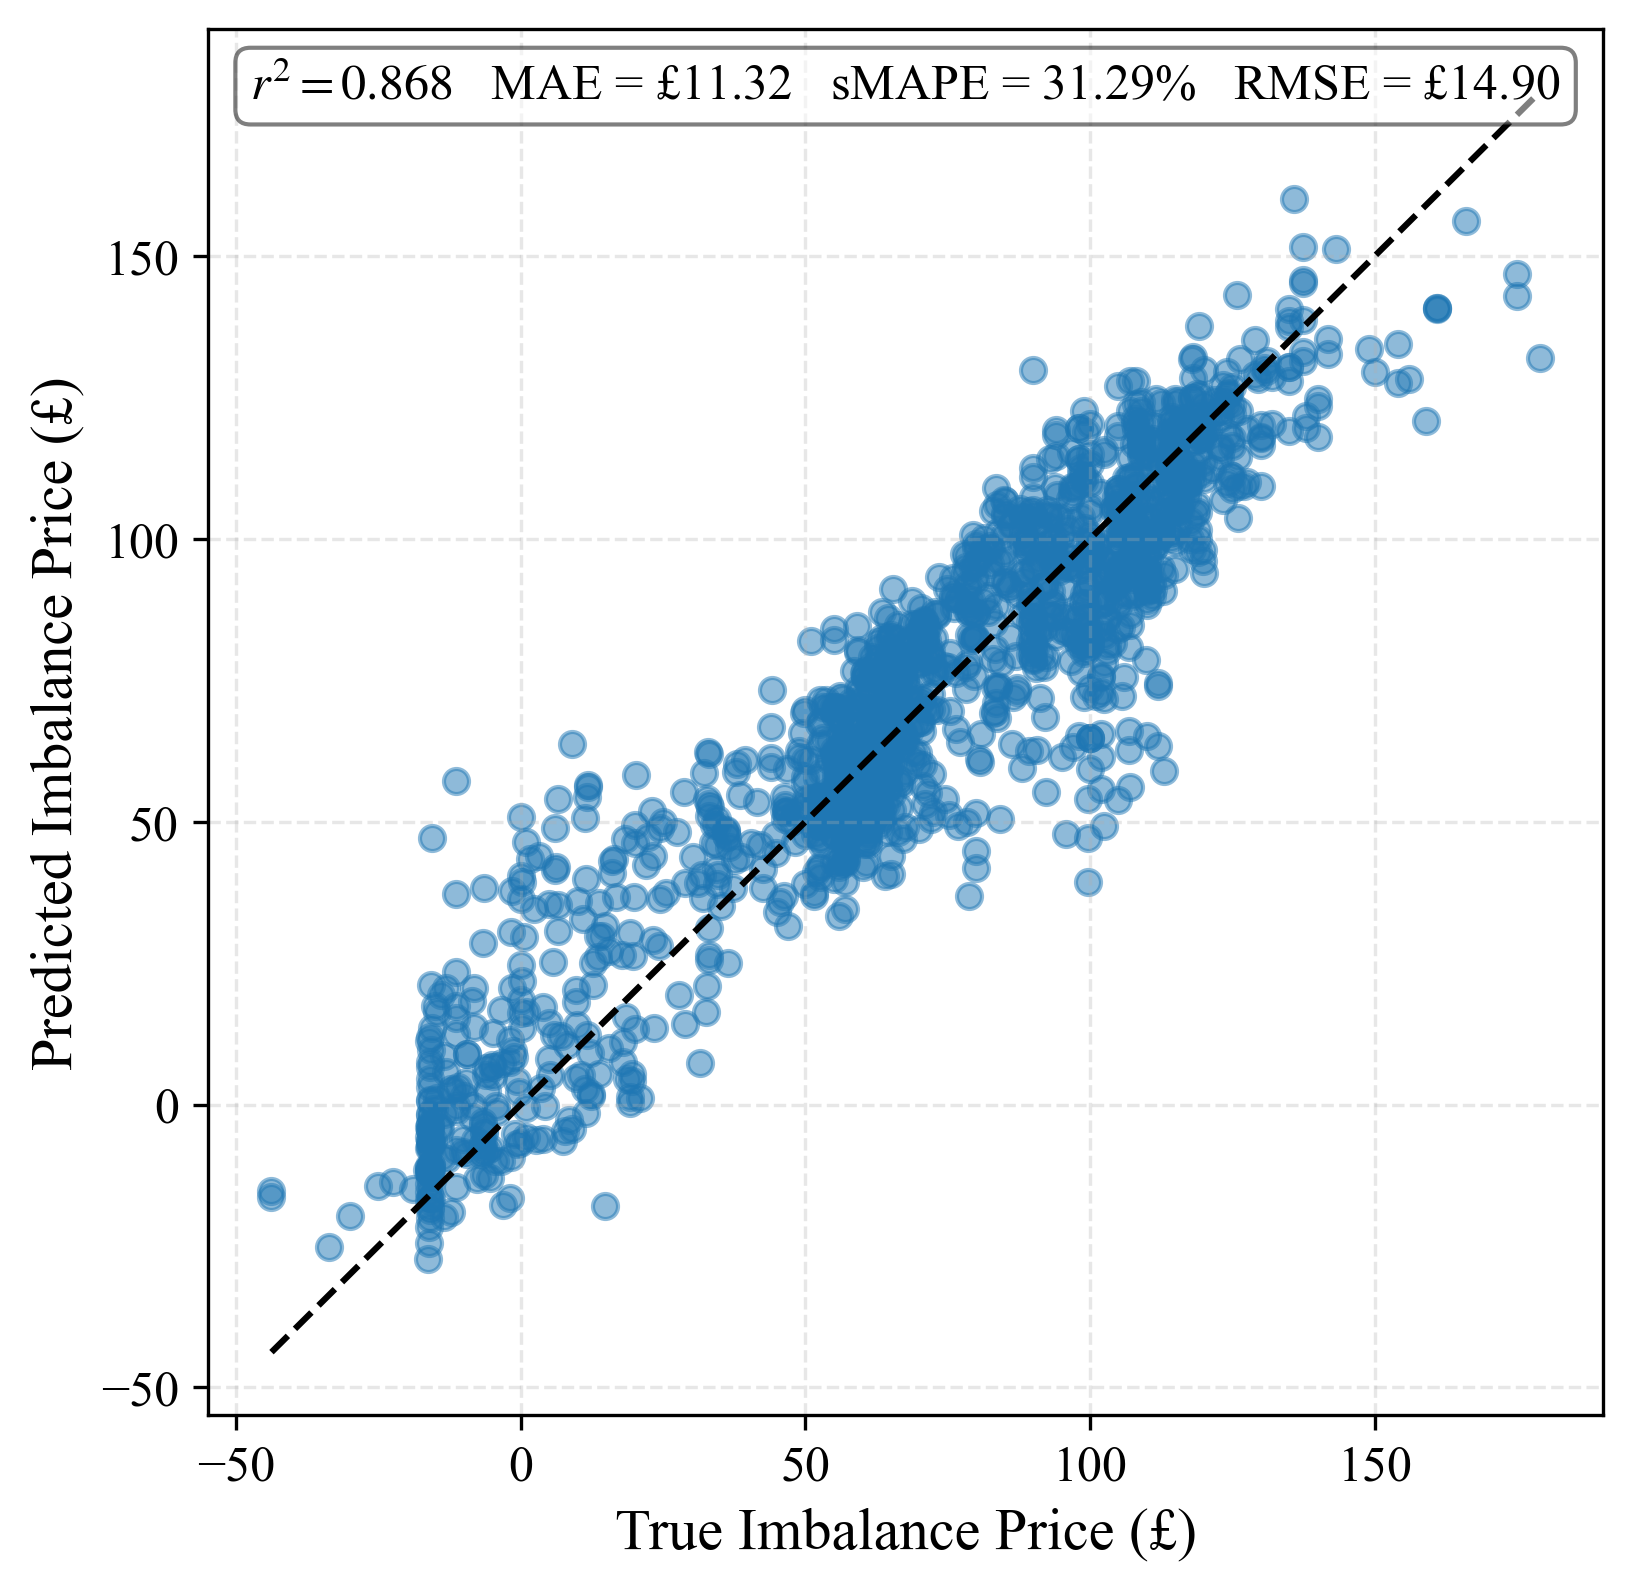

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(trues_orig, preds_orig, alpha=0.5)
mn, mx = trues_orig.min(), trues_orig.max()
plt.plot([mn, mx], [mn, mx], 'k--')
plt.xlabel('True Imbalance Price (£)')
plt.ylabel('Predicted Imbalance Price (£)')

# Add pseudo-legend in a horizontal line
textstr = (
    rf'$R^2 = {r2:.3f}$   '
    f'MAE = £{mae_val:.2f}   '
    f'sMAPE = {smape_val:.2f}%   '
    f'RMSE = £{rmse_val:.2f}'
)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.gca().text(0.5, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               horizontalalignment='center', bbox=props)

plt.grid(True)
plt.savefig(os.path.join(plots_dir, "predicted_vs_true.png"), dpi=300)
plt.show()

## Residuals Histogram

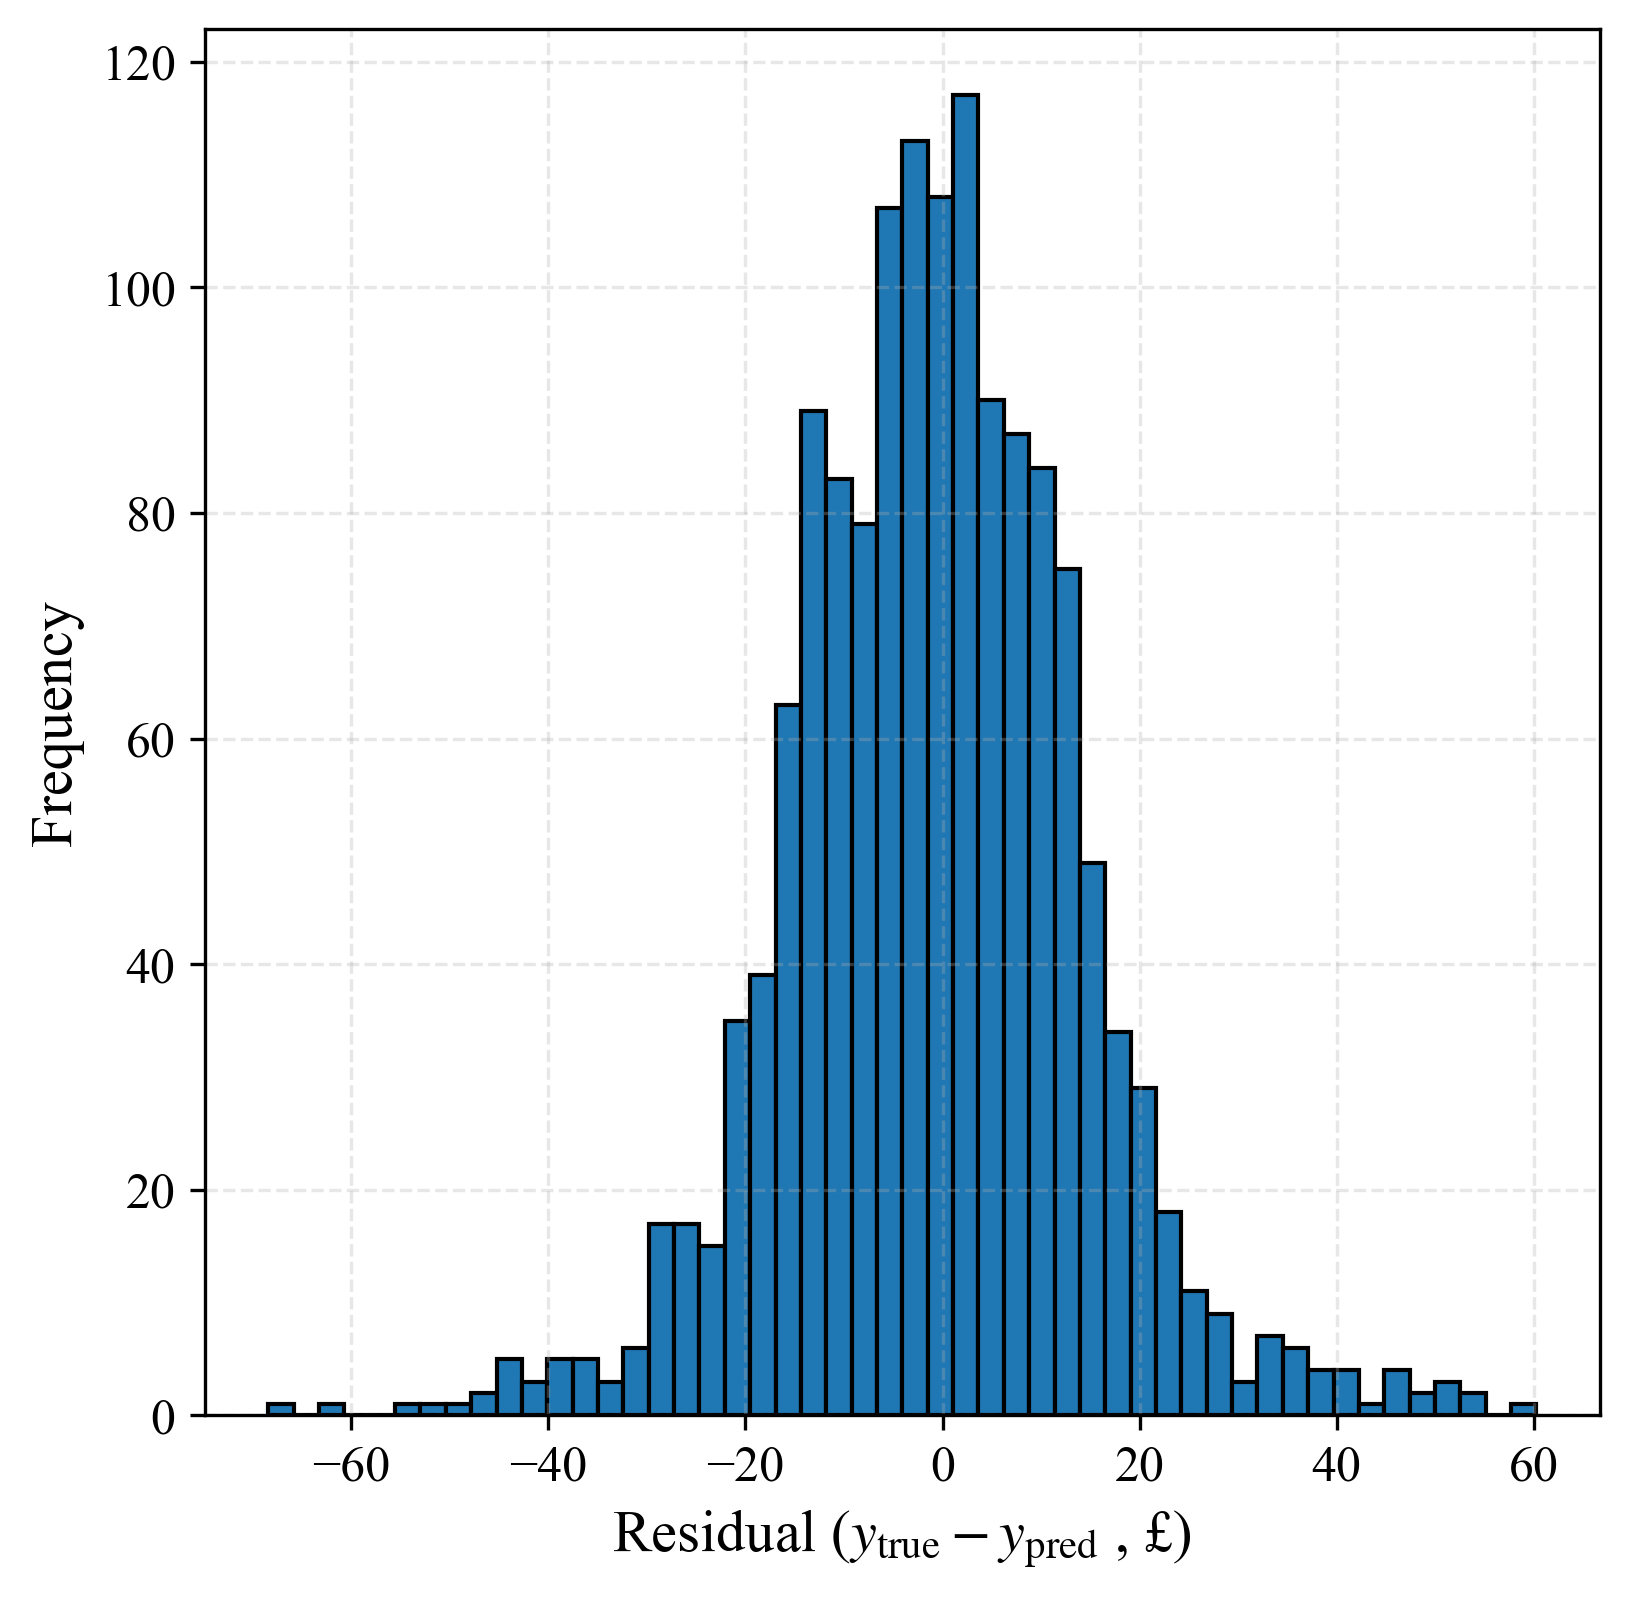

In [66]:
residuals = trues_orig - preds_orig
plt.figure(figsize=(6,6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel(r'Residual ($y_{\text{true}} - y_{\text{pred}}$ , £)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(plots_dir, "residuals_histogram.png"), dpi=300)
plt.show()

## True vs. Predicted - Time Series

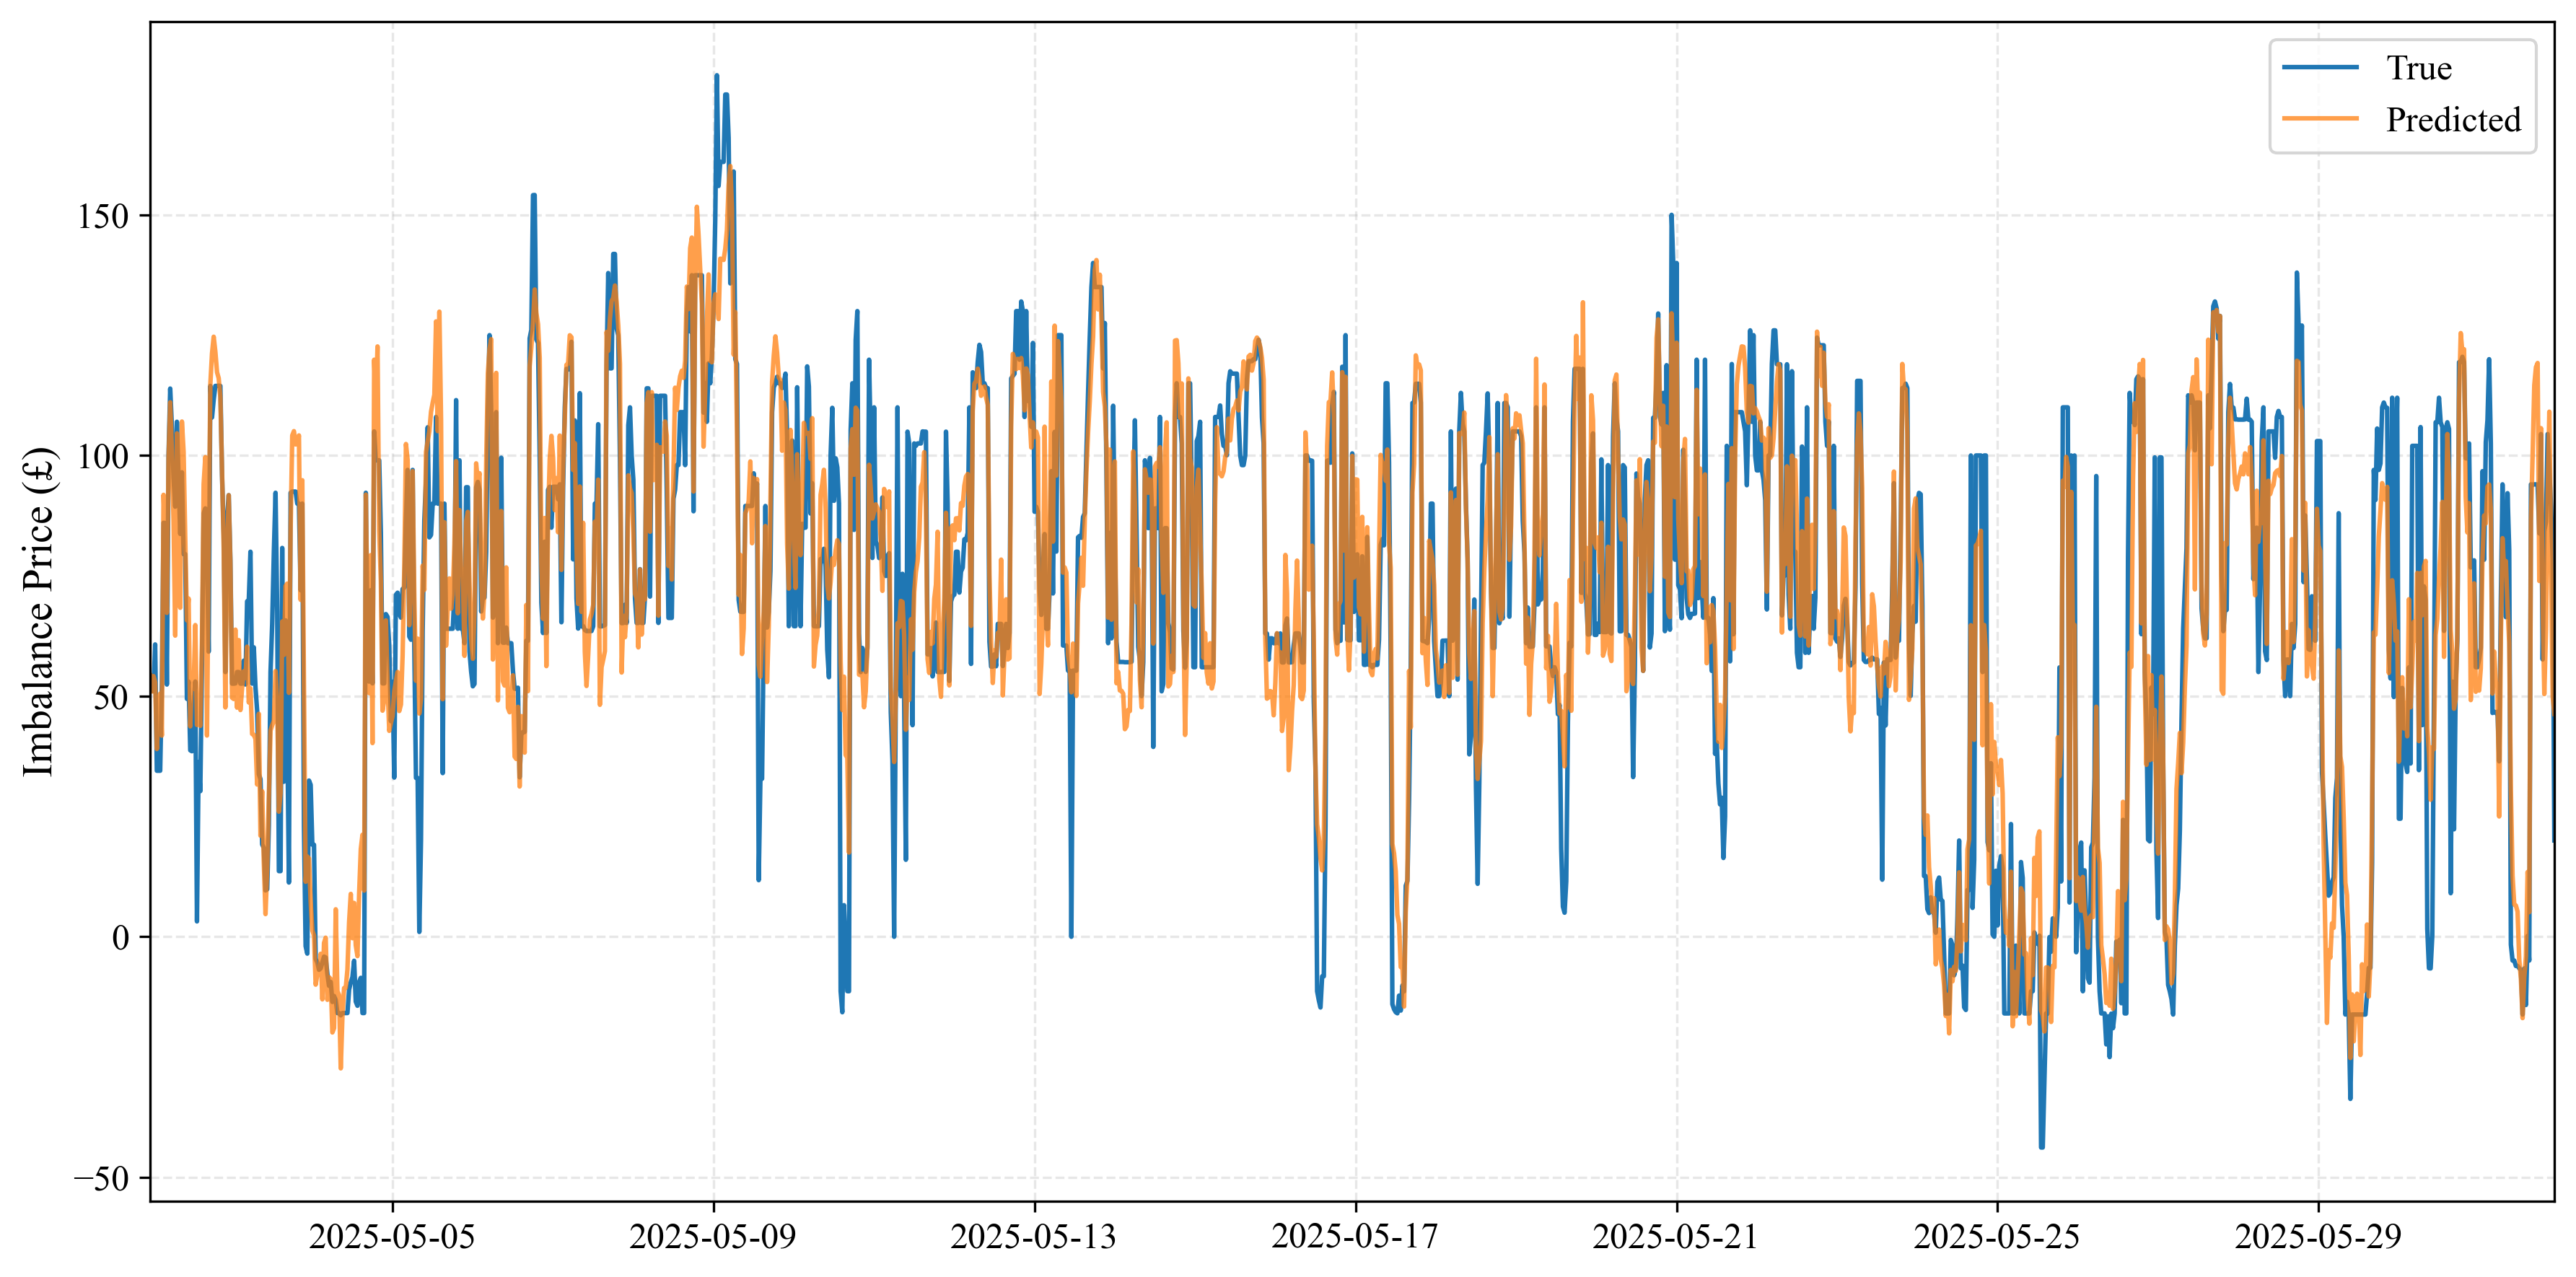

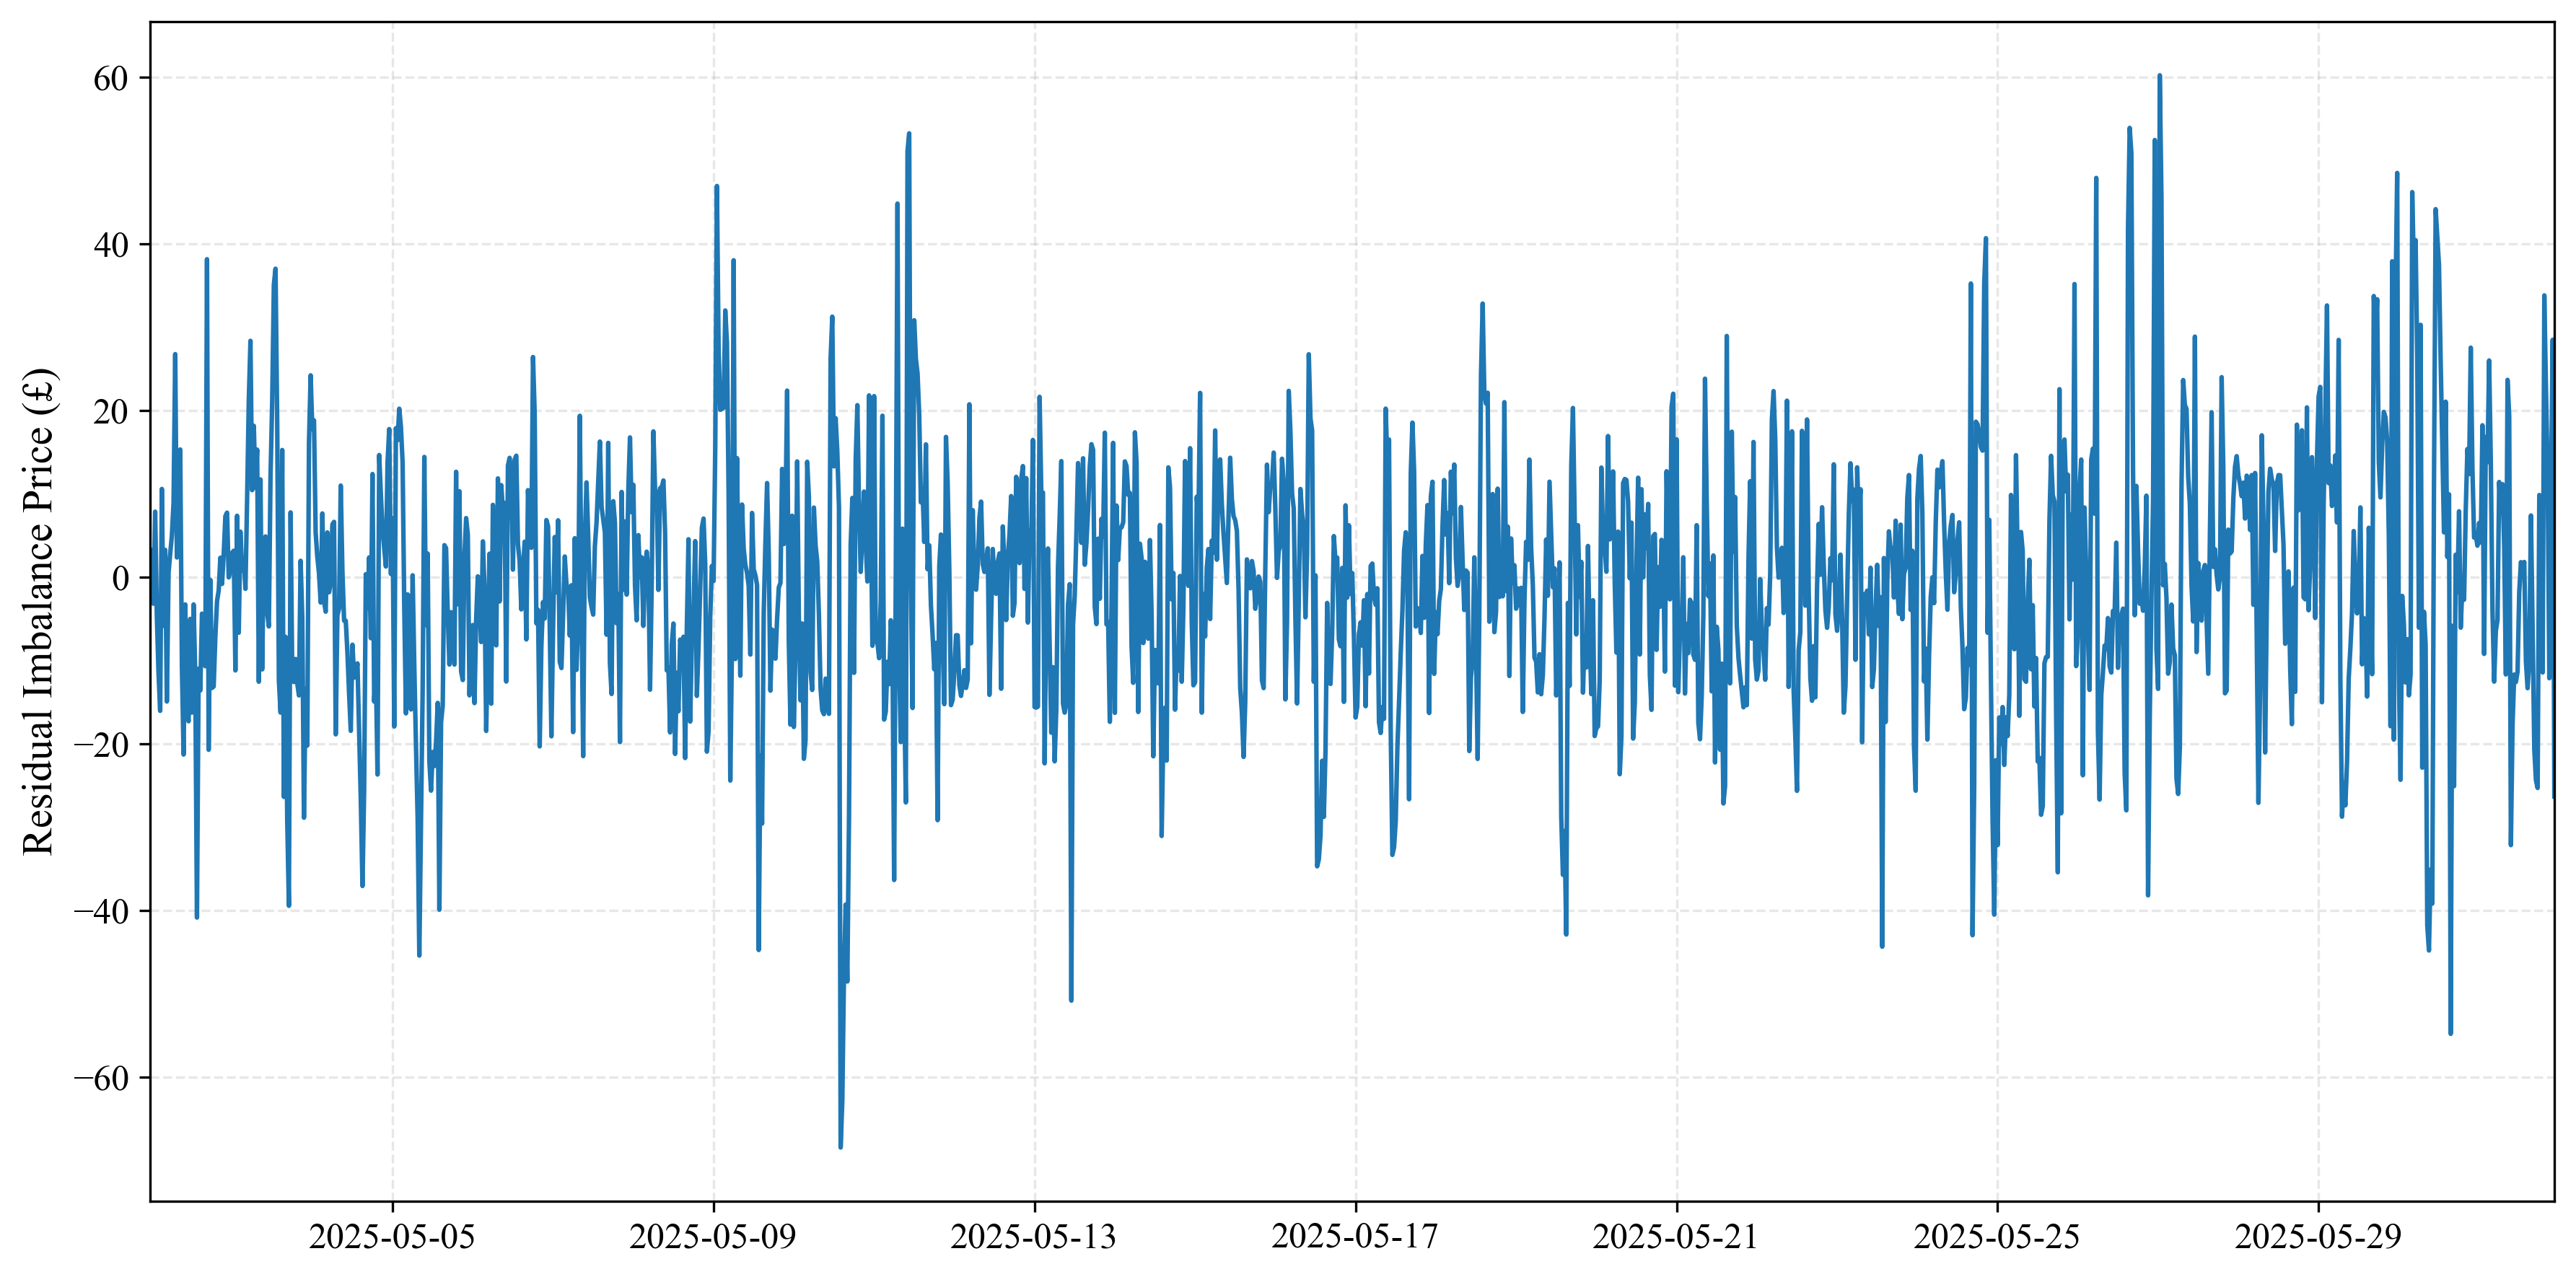

In [75]:
plt.figure(figsize=(12,6))
plt.plot(test_df.index[seq_len-1:], trues_orig, label="True", linewidth=1.5)
plt.plot(test_df.index[seq_len-1:], preds_orig, label="Predicted", linewidth=1.5, alpha=0.75)
plt.legend()
plt.ylabel("Imbalance Price (£)")
plt.xlim(test_df.index[seq_len-1], test_df.index[-1])
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "true_vs_predicted_over_time.png"), dpi=300)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(test_df.index[seq_len-1:], trues_orig - preds_orig, linewidth=1.5)
plt.ylabel("Residual Imbalance Price (£)")
plt.xlim(test_df.index[seq_len-1], test_df.index[-1])
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "residuals_over_time.png"), dpi=300)
plt.show()

# SHAP

In [35]:
import os
import joblib
import numpy as np
import torch
import torch.nn as nn
import shap
from sklearn.cluster import KMeans
from torch.utils.data import DataLoader

# ─── User‐settable K for K‐Means background ───────────────────────────
K = 300  # adjust as needed

# ─── Paths & flags ────────────────────────────────────────────────────
shap_path = os.path.join(base_dir, "shap_data.joblib")
need_compute = True

# ─── 1) Try loading existing SHAP if K matches ────────────────────────
if os.path.exists(shap_path):
    shap_data = joblib.load(shap_path)
    if shap_data.get("K") == K:
        shap_arr_gbp   = shap_data["shap_arr_gbp"]
        baseline_gbp   = shap_data["baseline_gbp"]
        print(f"✅ Loaded SHAP (K={K}) from {shap_path}")
        print(f"   shap_arr_gbp shape: {shap_arr_gbp.shape}")
        print(f"   baseline_gbp: {baseline_gbp:.4f}")
        need_compute = False
    else:
        print(f"⚠️ Found SHAP with K={shap_data.get('K')}, expected K={K}. Recomputing.")

# ─── 2) Compute & save if needed ───────────────────────────────────────
if need_compute:
    # A) Prepare training windows for K-Means
    def make_windows(X, seq_len):
        N = X.shape[0]
        return np.stack([X[i:i+seq_len] for i in range(N - seq_len + 1)], axis=0)

    X_tr_np = transformer.transform(train_df[all_feats])
    seq_len = summary["hyperparams"]["seq_len"]
    n_feats = len(all_feats)

    print("DEBUG: X_tr_np shape:", X_tr_np.shape)
    print("DEBUG: seq_len:", seq_len, "n_feats:", n_feats)

    X_tr_w = make_windows(X_tr_np, seq_len)
    flat   = X_tr_w.reshape(X_tr_w.shape[0], seq_len * n_feats)

    print("DEBUG: X_tr_w shape:", X_tr_w.shape)
    print("DEBUG: flat shape:", flat.shape)

    # B) K-Means clustering
    km = KMeans(n_clusters=K, random_state=0, n_init=10).fit(flat)
    cents_flat = km.cluster_centers_
    bg_windows_np = cents_flat.reshape(K, seq_len, n_feats)
    bg_tensor     = torch.from_numpy(bg_windows_np.astype(np.float32)).to(device)

    print("DEBUG: bg_windows_np shape:", bg_windows_np.shape)
    print("DEBUG: bg_tensor shape:", bg_tensor.shape)

    # C) Build test tensor
    test_ds = LSTMDataset(transformer.transform(test_df[all_feats]),
                          scaler_y.transform(test_df["Imbalance Price"].values.reshape(-1,1)).flatten(),
                          seq_len)
    test_loader = DataLoader(test_ds, batch_size=len(test_ds), shuffle=False)
    test_windows, _ = next(iter(test_loader))
    test_tensor     = test_windows.to(device)

    print("DEBUG: test_ds length:", len(test_ds))
    print("DEBUG: test_windows shape:", test_windows.shape)
    print("DEBUG: test_tensor shape:", test_tensor.shape)

    # D) Wrap model & explain
    class ShapModelWrapper(nn.Module):
        def __init__(self, base_model):
            super().__init__()
            self.base = base_model
        def forward(self, x):
            y = self.base(x)
            return y.unsqueeze(1) if y.dim()==1 else y

    wrapped = ShapModelWrapper(model).to(device)
    wrapped.eval()
    explainer = shap.DeepExplainer(wrapped, bg_tensor)

    raw_vals = explainer.shap_values(test_tensor, check_additivity=False)
    print("DEBUG: raw_vals shape:", raw_vals.shape)

    shap_arr_scaled = np.squeeze(raw_vals, axis=-1)
    print("DEBUG: shap_arr_scaled shape:", shap_arr_scaled.shape)

    baseline_scaled = explainer.expected_value[0]
    print("DEBUG: baseline_scaled:", baseline_scaled)

    # E) Un-scale
    shap_arr_gbp, baseline_gbp = unscale_shap(shap_arr_scaled, baseline_scaled, scaler_y)
    print("DEBUG: shap_arr_gbp shape:", shap_arr_gbp.shape)
    print("DEBUG: baseline_gbp:", baseline_gbp)

    # F) Save with K included
    shap_data = {
        "K":            K,
        "shap_arr_gbp": shap_arr_gbp,
        "baseline_gbp": baseline_gbp
    }
    joblib.dump(shap_data, shap_path, compress=3)
    print(f"✅ Computed & saved SHAP (K={K}) to {shap_path}")


DEBUG: X_tr_np shape: (64320, 9)
DEBUG: seq_len: 48 n_feats: 9
DEBUG: X_tr_w shape: (64273, 48, 9)
DEBUG: flat shape: (64273, 432)
DEBUG: bg_windows_np shape: (300, 48, 9)
DEBUG: bg_tensor shape: torch.Size([300, 48, 9])
DEBUG: test_ds length: 1439
DEBUG: test_windows shape: torch.Size([1439, 48, 9])
DEBUG: test_tensor shape: torch.Size([1439, 48, 9])


/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")
/opt/anaconda3/envs/thesis/lib/python3.10/site-packages/shap/explainers/_deep/deep_pytorch.py:255: UserWarning: unrecognized nn.Module: SeasonalAttn
  warnings.warn(f"unrecognized nn.Module: {module_type}")


DEBUG: raw_vals shape: (1439, 48, 9, 1)
DEBUG: shap_arr_scaled shape: (1439, 48, 9)
DEBUG: baseline_scaled: 0.07355898
DEBUG: shap_arr_gbp shape: (1439, 48, 9)
DEBUG: baseline_gbp: 125.31912987105548
✅ Computed & saved SHAP (K=300) to models/SA_BiLSTM_MaxAbs_Huber_lr.0001_bs128_hs64_nl2_sl48_me200_p20_NoTimeFeats/shap_data.joblib


## Plots per Feature

In [38]:
# Flatten into (test_length*48, num_feats)
vals_flat = shap_arr_gbp.reshape(-1, shap_arr_gbp.shape[-1])
feat_flat = test_tensor.cpu().numpy().reshape(-1, shap_arr_gbp.shape[-1])

print("shap_arr_gbp shape:", shap_arr_gbp.shape)       a   # (1439, 48, num_feats)
print("test_tensor shape:", test_tensor.shape)   # (1439, 48, num_feats)
print("vals_flat shape:", vals_flat.shape)       # (1439*48, num_feats)
print("feat_flat shape:", feat_flat.shape)       # (1439*48, num_feats)

shap_arr_gbp shape: (1439, 48, 9)
test_tensor shape: torch.Size([1439, 48, 9])
vals_flat shape: (69072, 9)
feat_flat shape: (69072, 9)


### Beeswarm

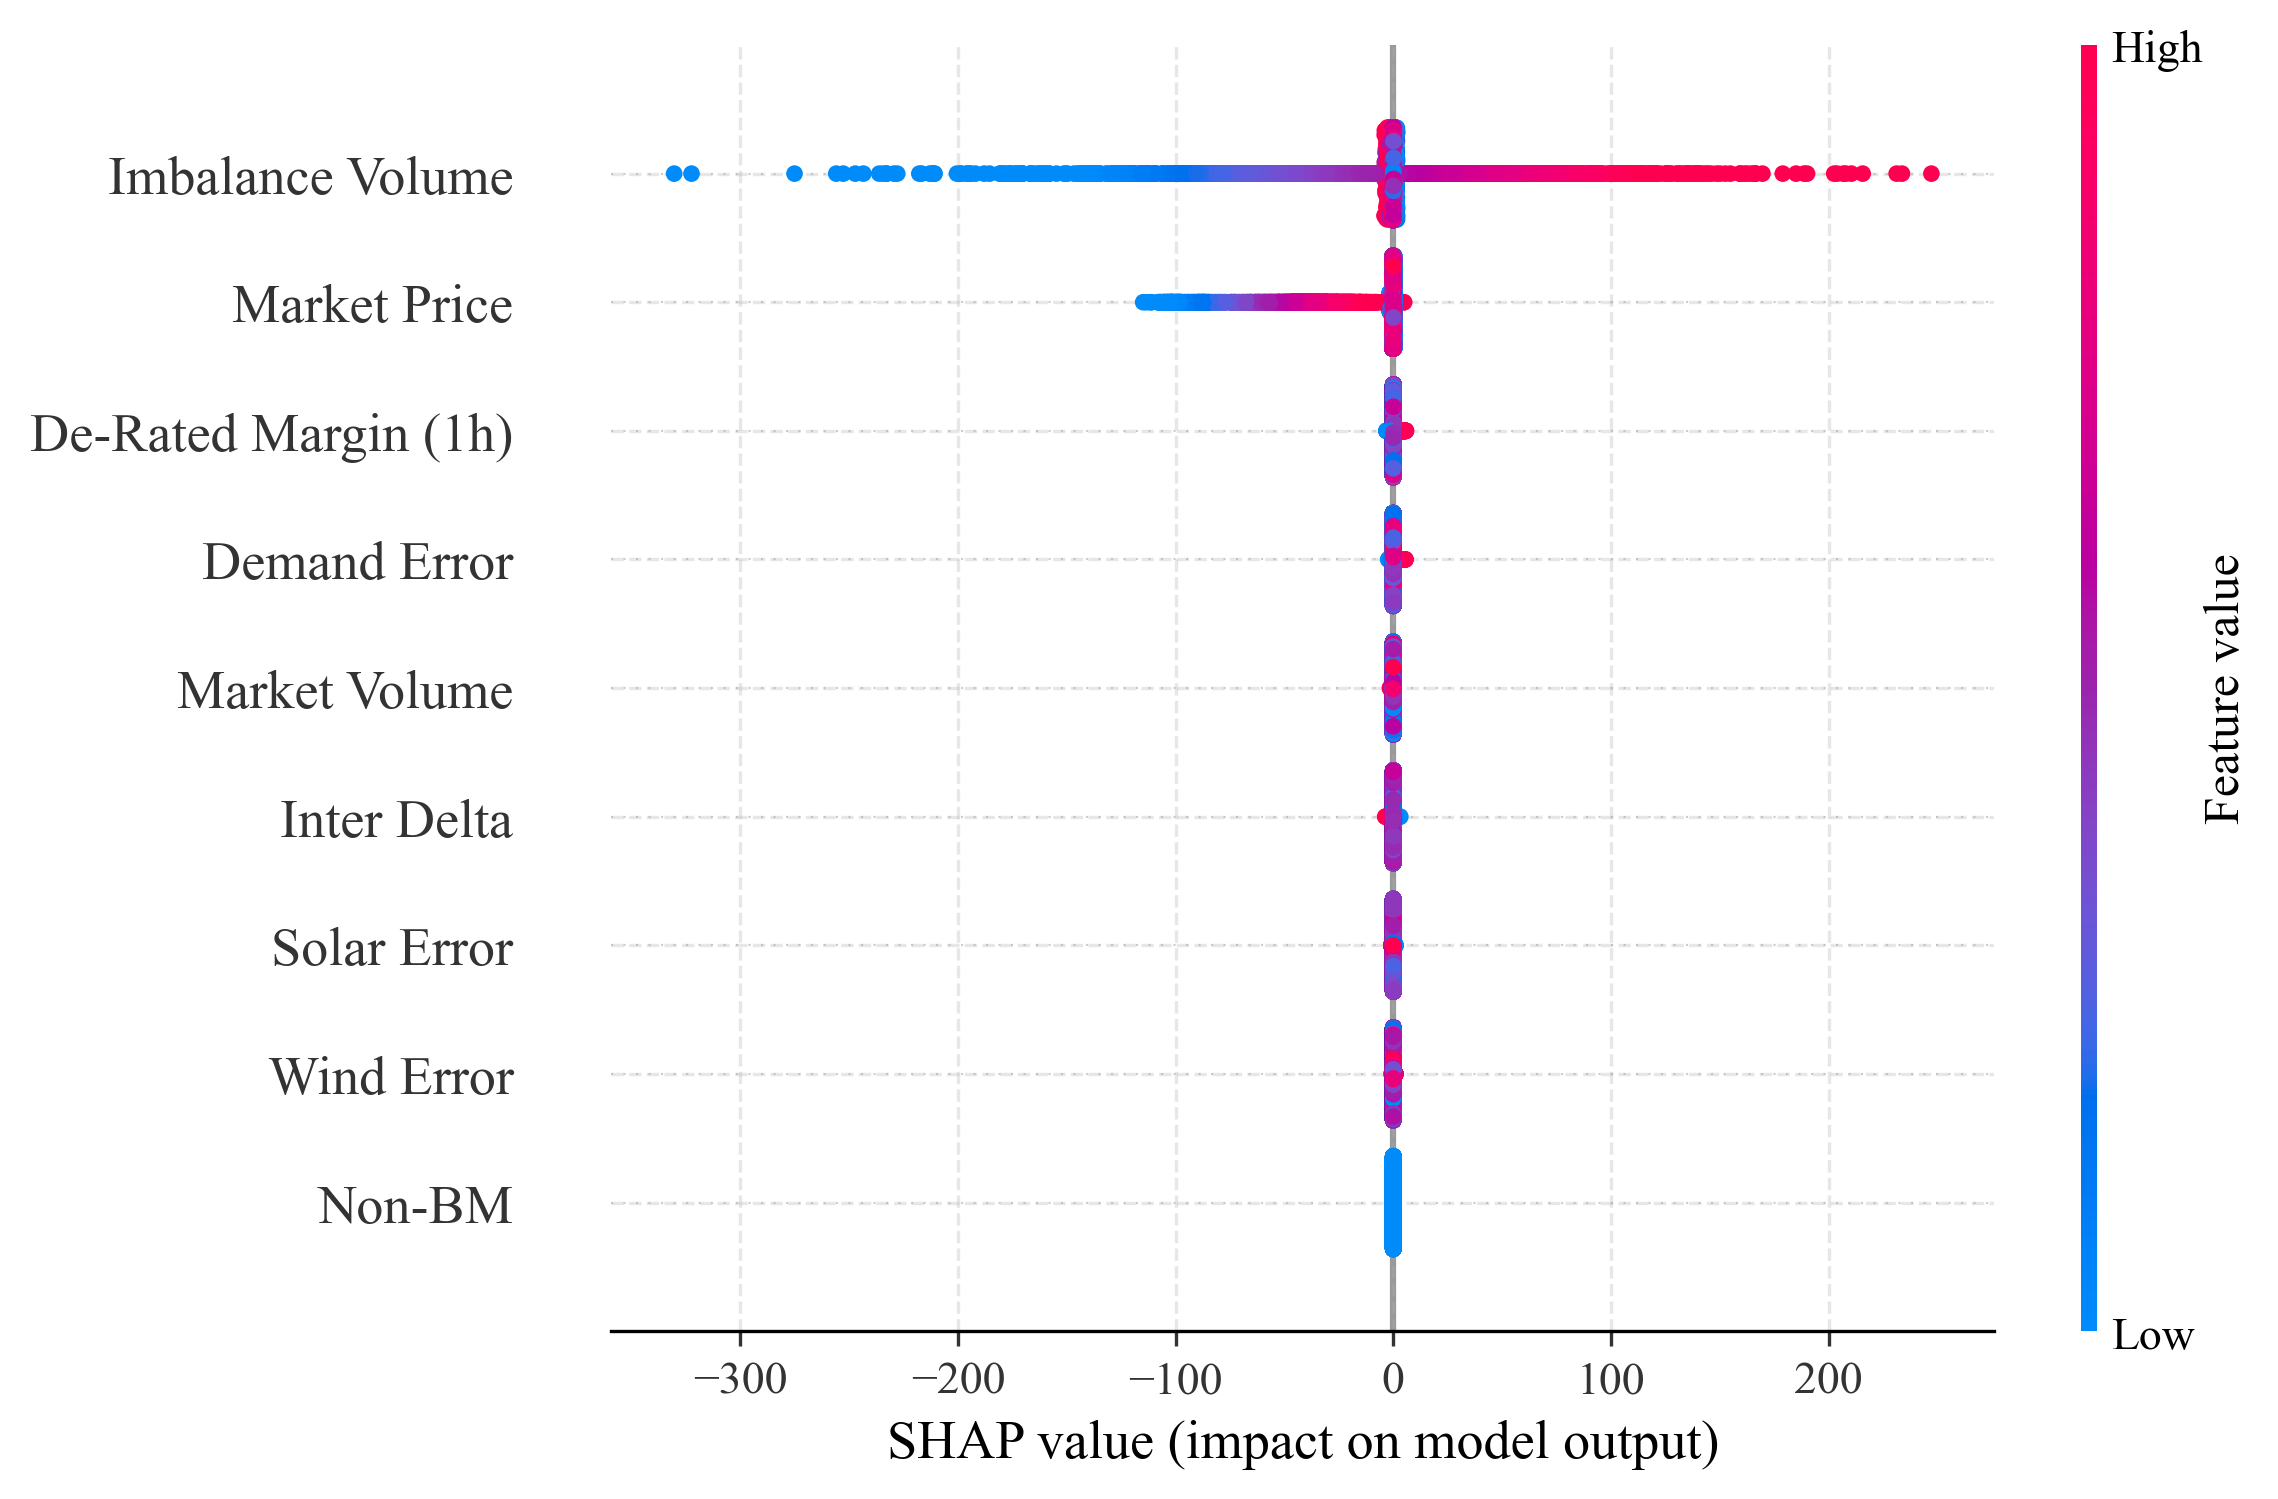

In [39]:
# shap_gbp has shape (1439, 48, num_feats)
# X_te_w  has shape (1439, 48, num_feats)

# Create fancy feature names for more readable plots
fancy_feats = all_feats.copy()
for i, feat in enumerate(all_feats):
    if feat == 'tod_sin':
        fancy_feats[i] = "Sin(Time of Day)"
    elif feat == 'tod_cos':
        fancy_feats[i] = "Cos(Time of Day)"
    elif feat == 'dow_sin':
        fancy_feats[i] = "Sin(Day of Week)"
    elif feat == 'dow_cos':
        fancy_feats[i] = "Cos(Day of Week)"
    elif feat == 'moy_sin':
        fancy_feats[i] = "Sin(Month of Year)"
    elif feat == 'moy_cos':
        fancy_feats[i] = "Cos(Month of Year)"

shap.initjs()
shap.summary_plot(
    vals_flat,
    feat_flat,
    feature_names=fancy_feats,
    max_display=15,
    plot_type="dot",
    show=False
)
plt.gcf()
plt.savefig(os.path.join(plots_dir, "shap_beeswarm.png"), dpi=300)


### Mean Absolute Shap Value

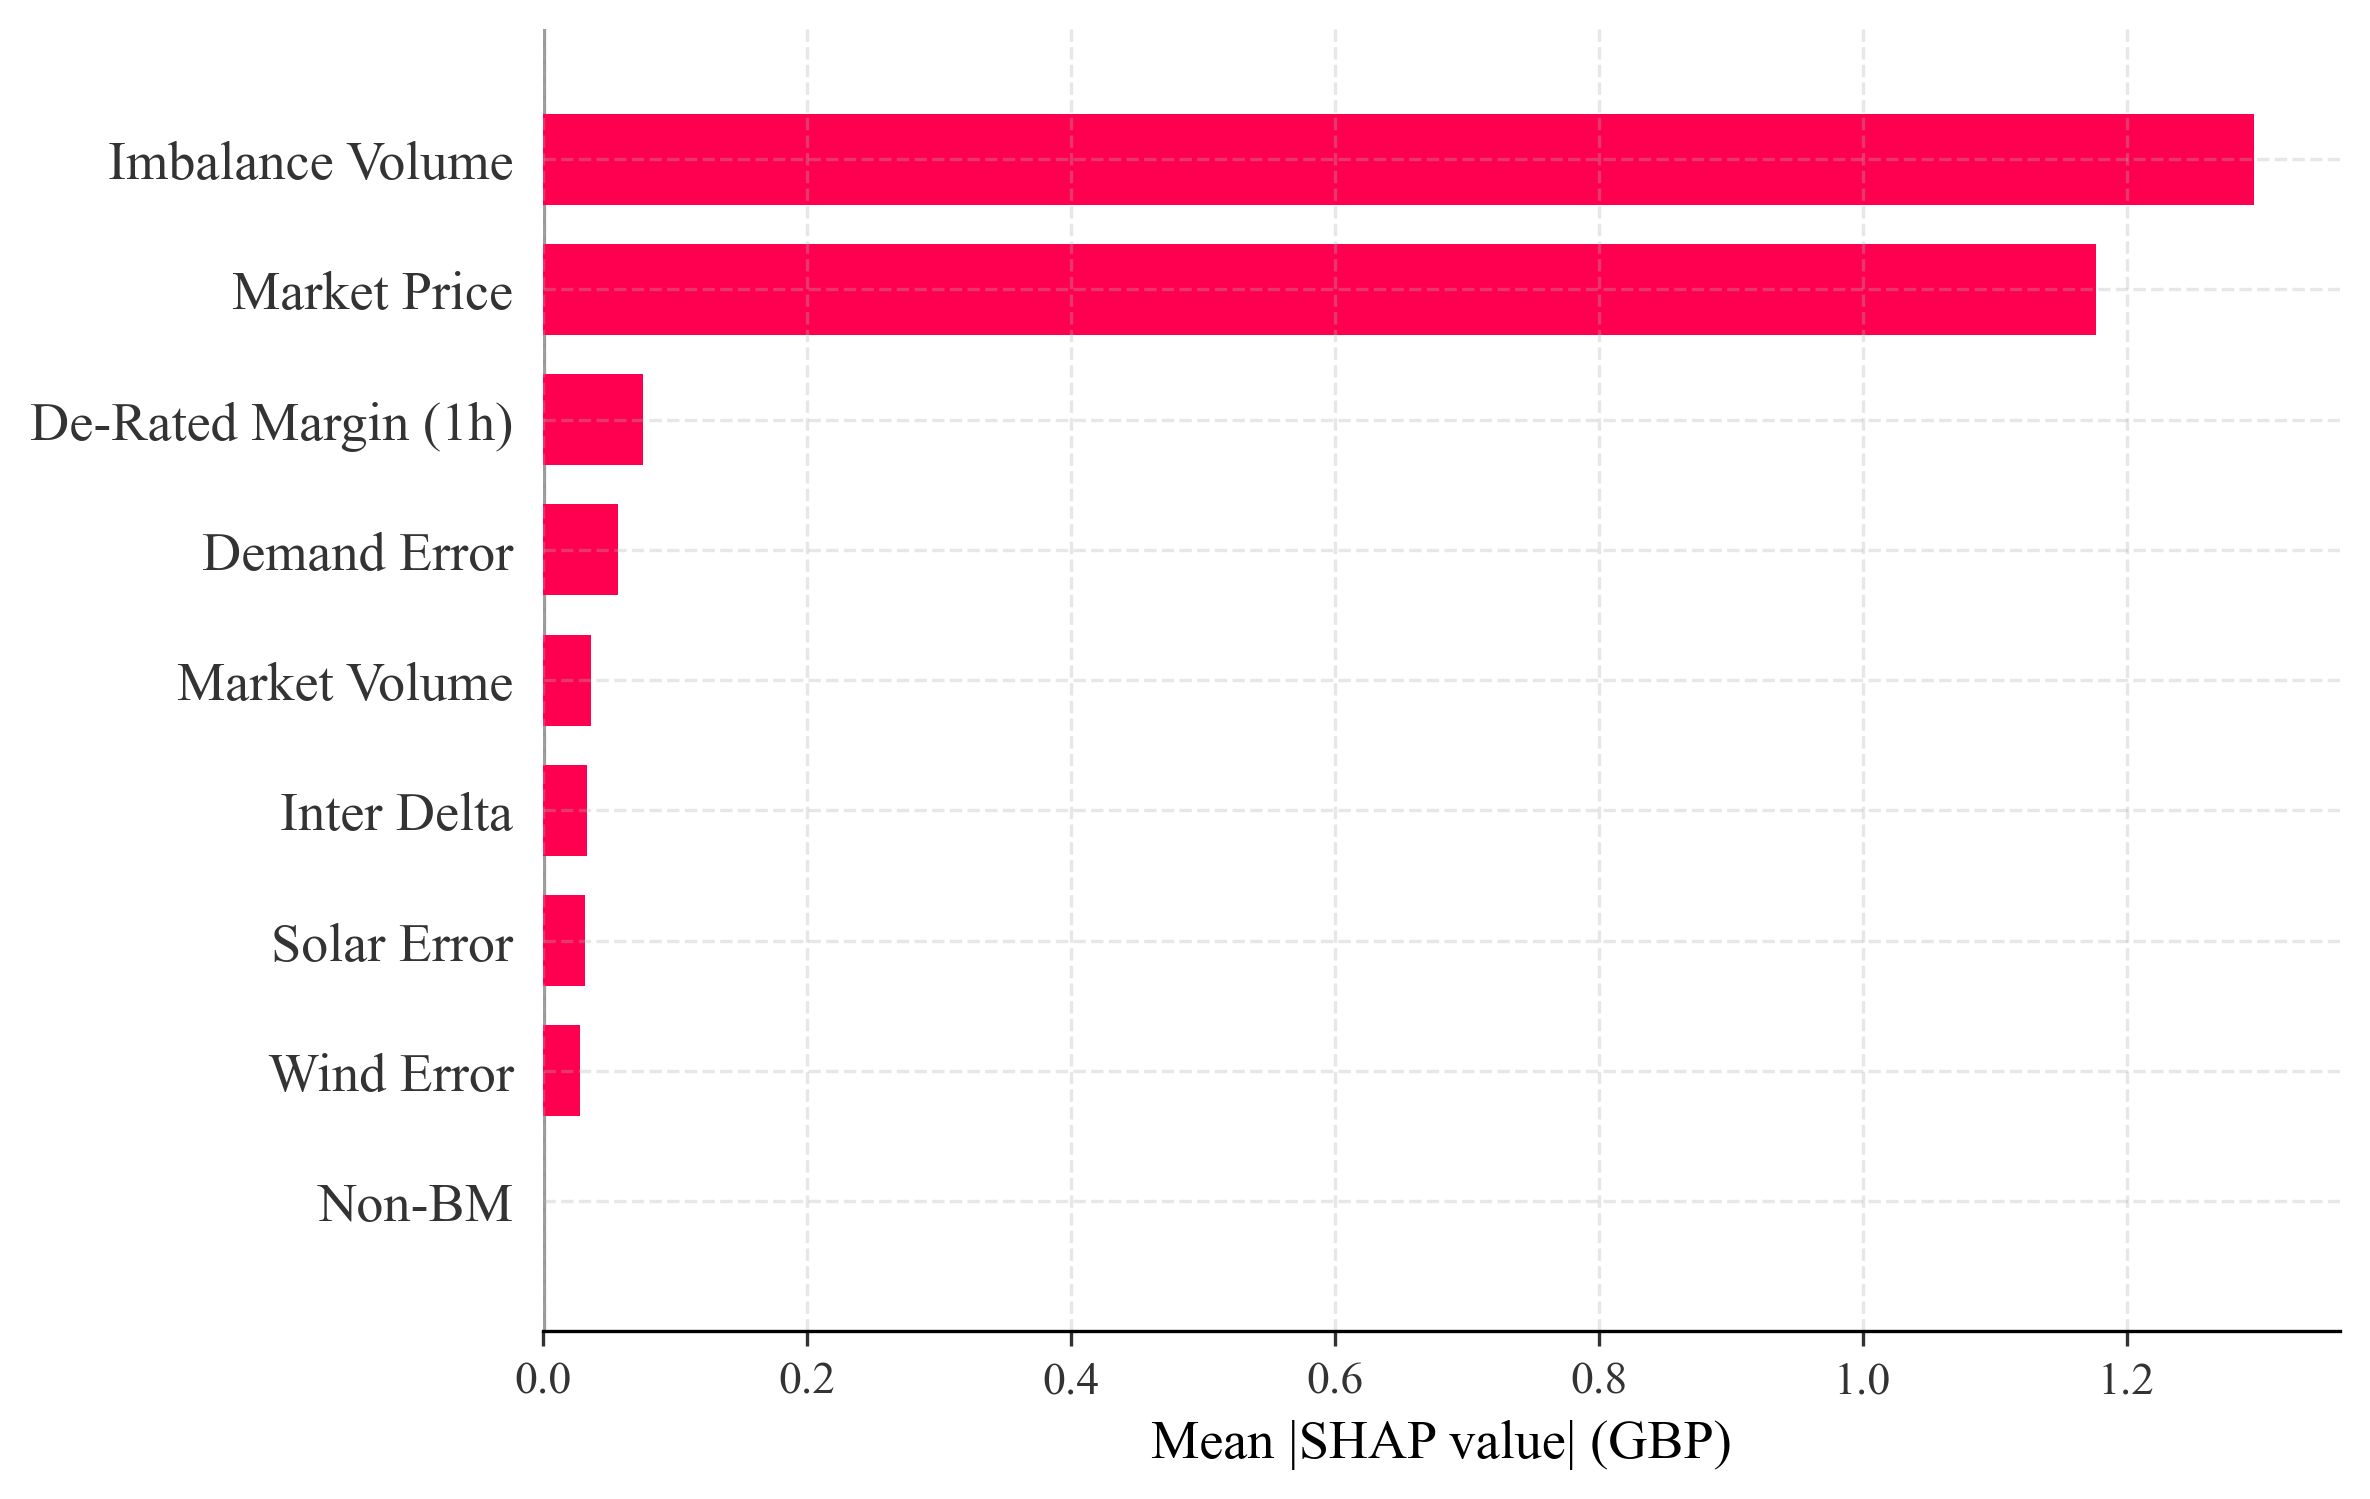

In [40]:
plt.figure(figsize=(10, 6))
shap.summary_plot(
    np.abs(vals_flat),        # pass in ALL absolute SHAP values
    feat_flat,                # or np.zeros_like(vals_flat) if you just want bars
    feature_names=fancy_feats,
    plot_type="bar",          # bar = mean(|SHAP|) per feature
    max_display=len(fancy_feats),
    show=False,
    color="#ff0051"           # override default color
)
plt.xlabel("Mean |SHAP value| (GBP)")
plt.ylabel("")               # keep only feature labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "shap_mean_bar.png"), dpi=300)
plt.show()

## Plots per Settlement Period

In [41]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# 1) Compute per-window, per-lag shap by aggregating across features
shap_by_lag = np.mean(shap_arr_gbp, axis=2)  # shape: (n_windows, seq_len)

# 2) Debug prints
n_windows, seq_len = shap_by_lag.shape
print("DEBUG: shap_arr_gbp shape:", shap_arr_gbp.shape)
print("DEBUG: shap_by_lag shape:", shap_by_lag.shape)  # expect (n_windows, seq_len)

# 3) Define lag feature names
lag_names = [f"Lag {i+1}" for i in range(seq_len)]

DEBUG: shap_arr_gbp shape: (1439, 48, 9)
DEBUG: shap_by_lag shape: (1439, 48)


### Beeswarm

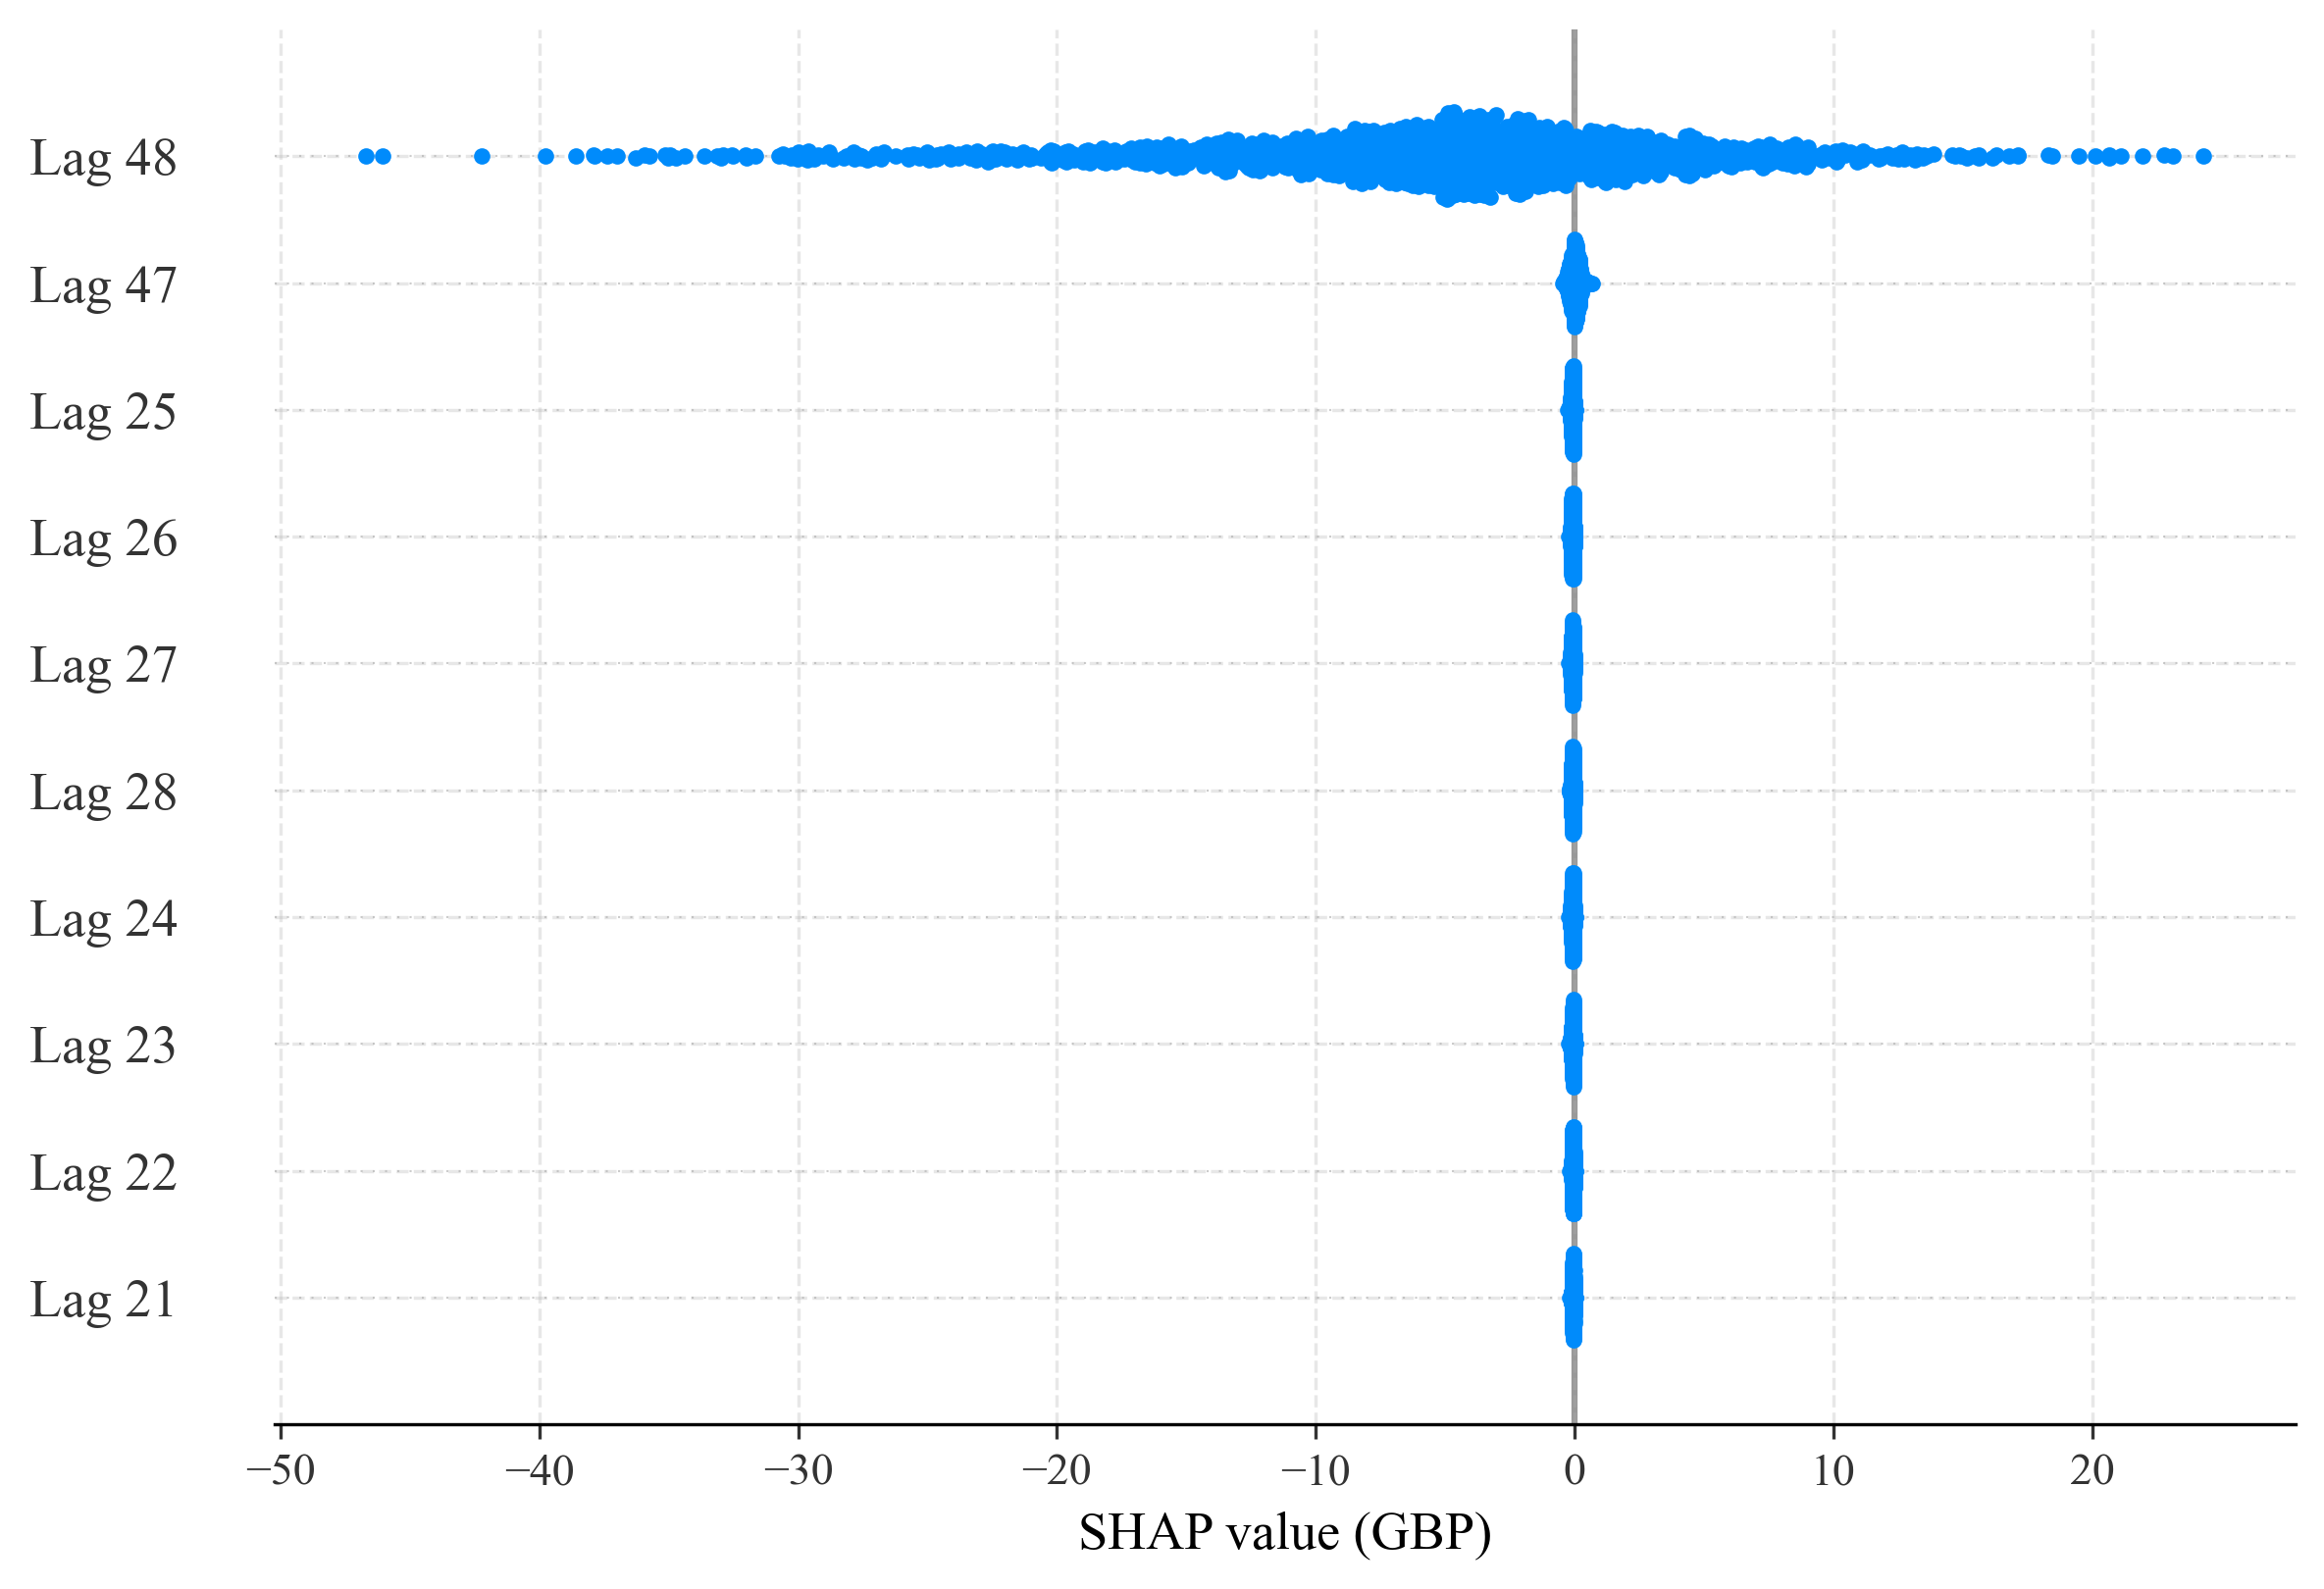

In [73]:
# 4) Beeswarm plot of raw SHAP by lag
shap.initjs()
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_by_lag, 
    feature_names=lag_names,
    plot_type="dot",
    max_display=10,
    show=False
)
plt.xlabel("SHAP value (GBP)")
plt.ylabel("")  # keep lag names on y-axis
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "shap_beeswarm_by_lag.png"), dpi=300)
plt.show()

### Mean Absolute Shap Value

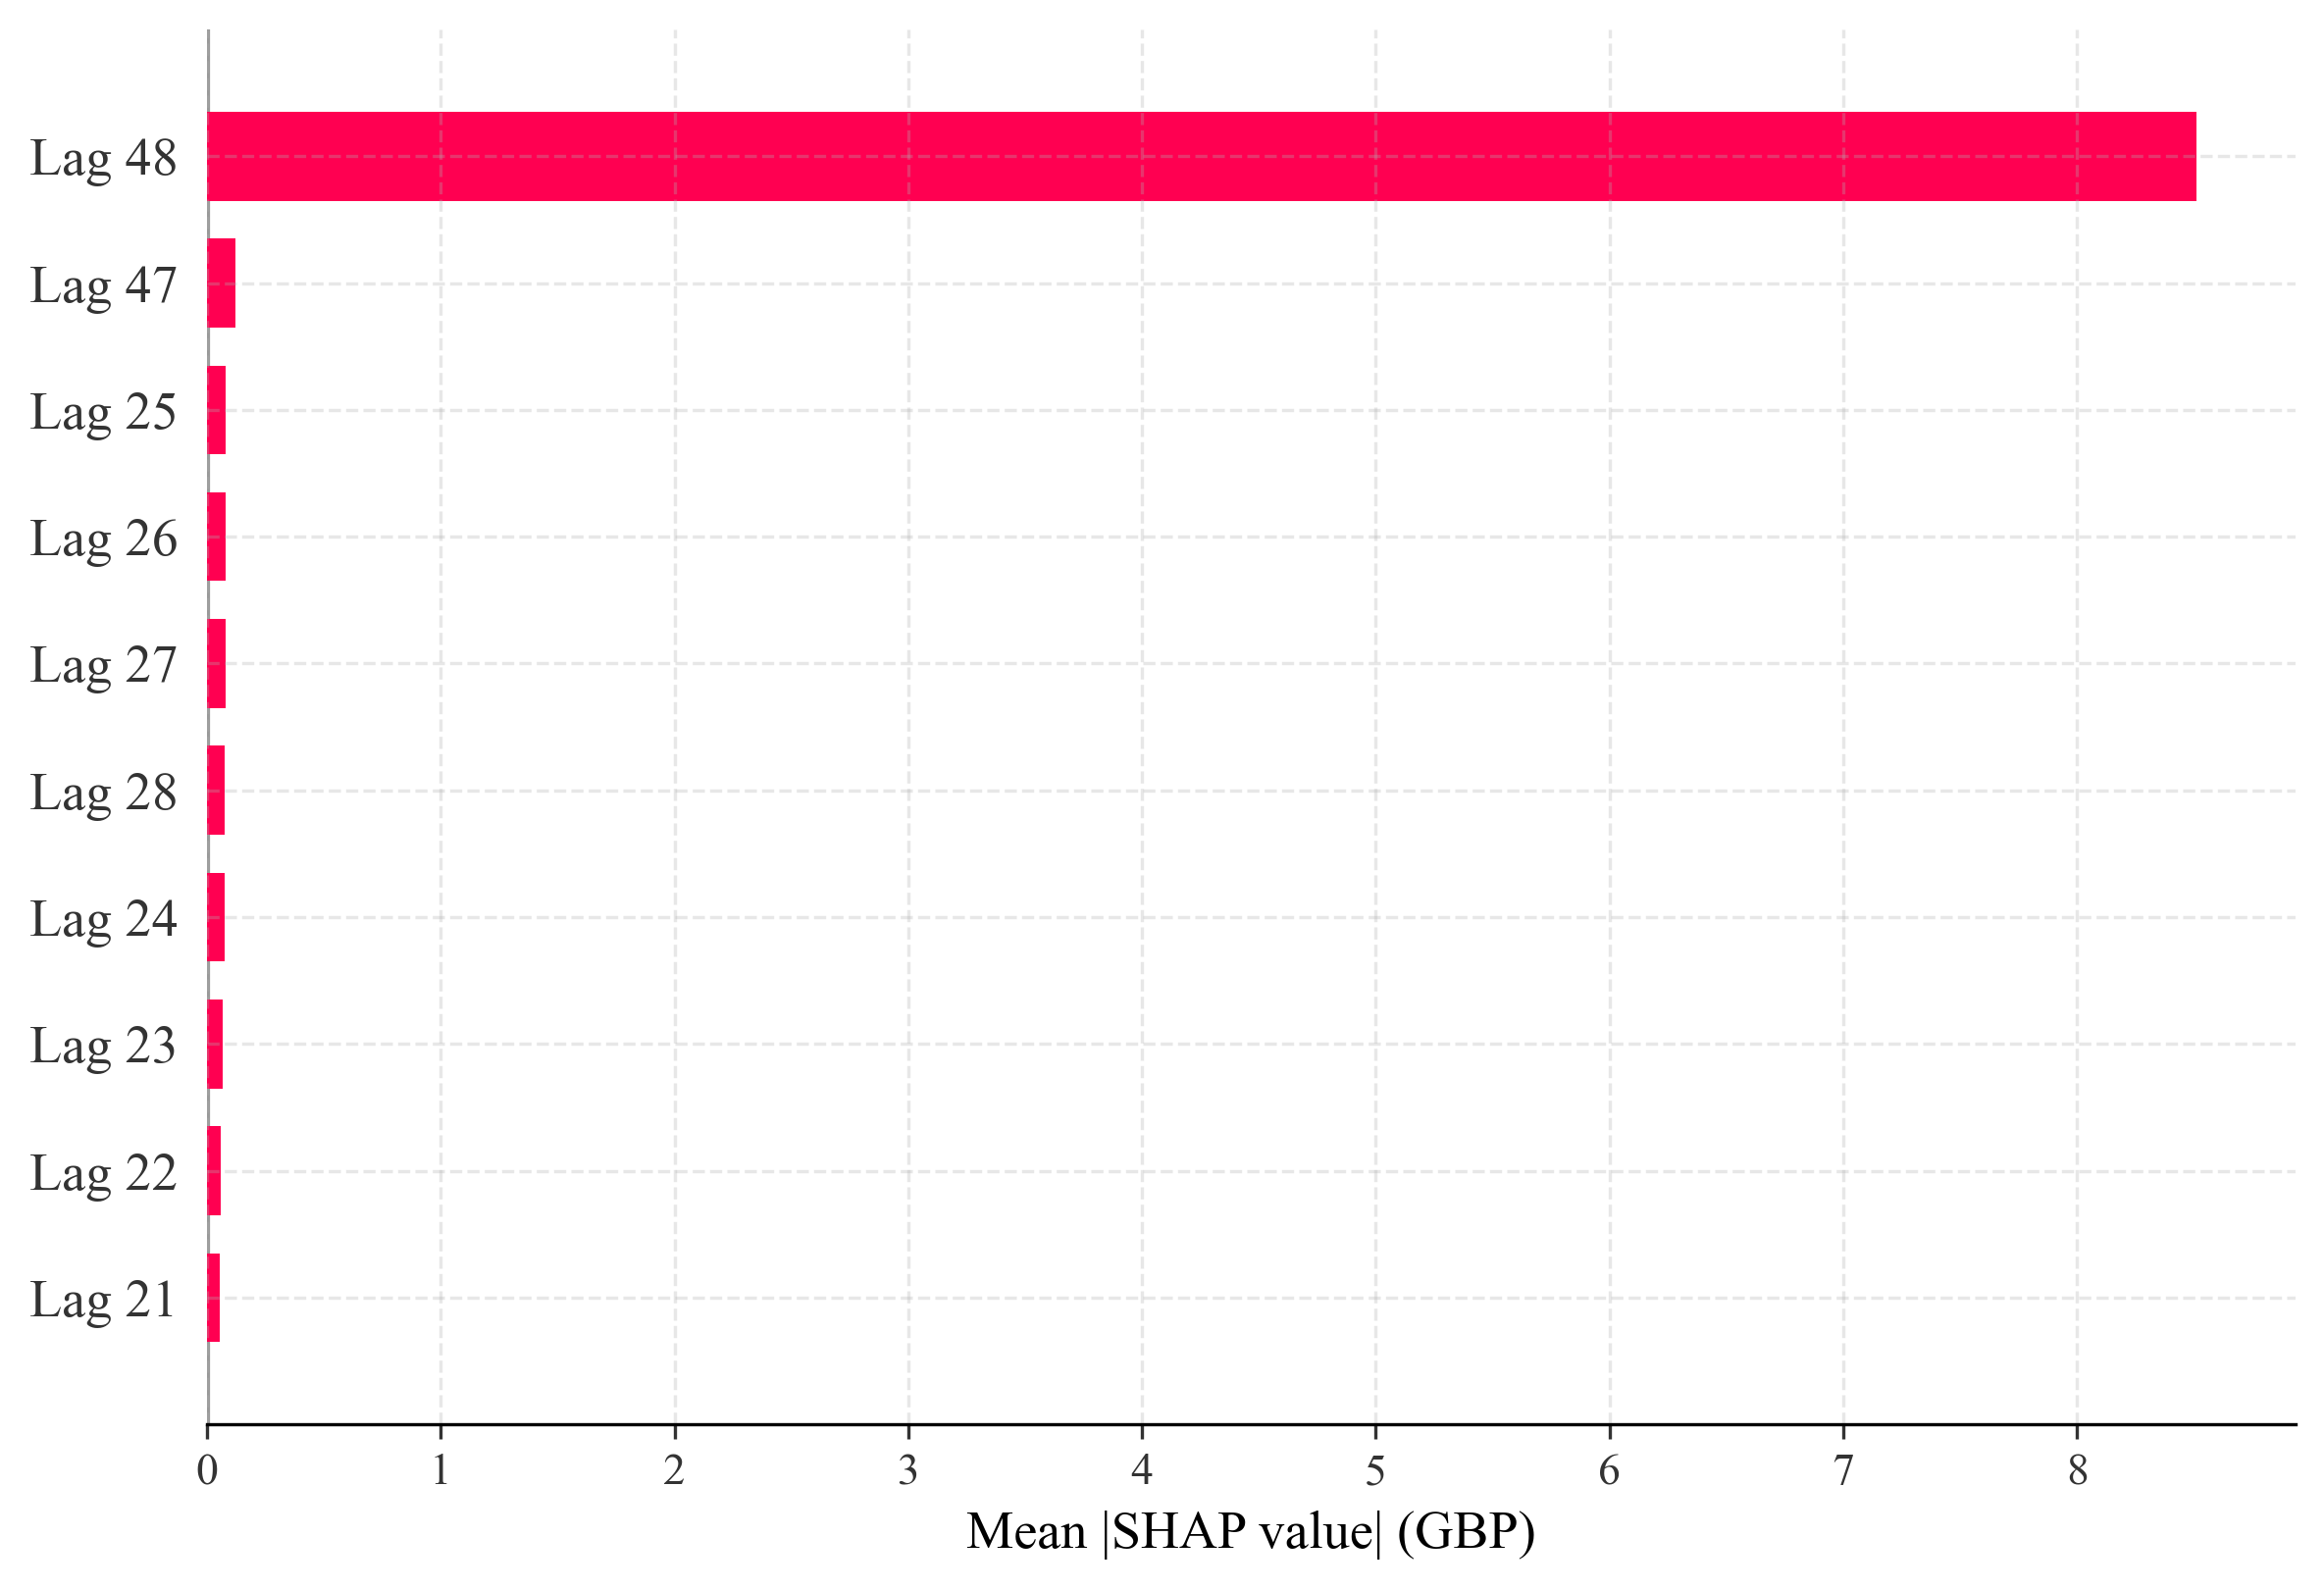

In [74]:
# 5) Bar plot of mean |SHAP| by lag
plt.figure(figsize=(10, 6))
shap.summary_plot(
    np.abs(shap_by_lag),
    feature_names=lag_names,
    plot_type="bar",
    max_display=10,
    show=False,
    color="#ff0051"
)
plt.xlabel("Mean |SHAP value| (GBP)")
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "shap_mean_bar_by_lag.png"), dpi=300)
plt.show()

## Downloading Files (COLAB ONLY)

In [ ]:
import shutil, os
from google.colab import files

shutil.make_archive(tag, 'zip', base_dir)
files.download(f"{tag}.zip")